## i. Introduction

By: George Kenji Putra

Dataset: **Telecom Customer Churn**

This dataset contains information on all about 37,000 customers from a Telecommunications company. Each record represents one customer, and contains details about their `age`, `gender`, `region_category`, `joining_date`, and more. For more information, kindly visit [here](https://github.com/H8-Assignments-Bay/p2-ftds005-hck-ml1-georgekenjiputra).

Objective: The project aims to predict customer churn using deep learning. By analyzing historical customer data, the model identifies patterns to determine which customers are likely to stop using the company's services.

Deployment : For model deployment, please visit here: [Hugging Face](https://huggingface.co/spaces/agayabag/deploy_churn_prediction_again).

## ii. Importing Libraries

In [1]:
# importing libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import phik
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline
from feature_engine.outliers import Winsorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# applying this setting in order to show all the columns

pd.set_option('display.max_columns', None)

## iii. Data Loading and Overview

### iii.i Data Loading and Its General Information

Here is the detailed information regarding every column in the dataset:


| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

In [3]:
# loading and assigning the dataset as df, then showing the first 10 data for general overview

df = pd.read_csv('Customer Churn Prediction - DL.csv')
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# showing the last 10 data to gain more information

df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# checking general information regarding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

From informations above, we know that:

* The dataset has 37,010 entries or row.
* The dataset has the total of 22 columns.
* The dataset has three data types within it, which are float (4 columns), integer (3 columns), and object (15 columns).
* There are <mark>missing values</mark> in this dataset.

### iii.ii Checking and Handling Duplicated Rows

In [6]:
# checking duplicated rows in the dataset

df.duplicated().sum()

18

Duplicates data are <mark>detected</mark>. It will be dropped in the next process.

In [7]:
# dropping duplicated data

df.drop_duplicates(inplace=True)

# checking back the number of duplicated data

df.duplicated().sum()

0

### iii.iii Checking and Handling Missing Values (If Needed)

In [8]:
# checking missing values in the dataset

df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
# making function for the missing value detection

def mv_percent(df):
    num_mv =  np.sum(df.isnull().sum())
    num_total = df.count()
    return (num_mv/num_total)*100

# printing how many percent of missing value in every column

for column in df.columns:
    percent = str(round(mv_percent(df[column]), 2))
    print(f'Missing Value in "{column}": {percent}%')

Missing Value in "user_id": 0.0%
Missing Value in "age": 0.0%
Missing Value in "gender": 0.16%
Missing Value in "region_category": 17.2%
Missing Value in "membership_category": 0.0%
Missing Value in "joining_date": 0.0%
Missing Value in "joined_through_referral": 17.23%
Missing Value in "preferred_offer_types": 0.78%
Missing Value in "medium_of_operation": 17.07%
Missing Value in "internet_option": 0.0%
Missing Value in "last_visit_time": 0.0%
Missing Value in "days_since_last_login": 0.0%
Missing Value in "avg_time_spent": 0.0%
Missing Value in "avg_transaction_value": 0.0%
Missing Value in "avg_frequency_login_days": 0.0%
Missing Value in "points_in_wallet": 0.0%
Missing Value in "used_special_discount": 0.0%
Missing Value in "offer_application_preference": 0.0%
Missing Value in "past_complaint": 0.0%
Missing Value in "complaint_status": 0.0%
Missing Value in "feedback": 0.0%
Missing Value in "churn_risk_score": 0.0%


Given the <mark>low percentage</mark> of missing values in the `gender` and `preferred_offer_types` columns, as well as their categorization as <mark>Missing Completely at Random (MCAR)</mark>, it is deemed appropriate to <mark>remove</mark> the rows with missing values from these columns.

In [10]:
# removing the missing value from gender and preferred_offer_types columns

df.dropna(subset=['gender', 'preferred_offer_types'], inplace=True)

In [11]:
# checking back the missing values in the dataset after the handling

df.isnull().sum()

user_id                            0
age                                0
gender                             0
region_category                 5371
membership_category                0
joining_date                       0
joined_through_referral         5385
preferred_offer_types              0
medium_of_operation             5334
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Regarding the <mark>remaining columns</mark> with missing values, we will proceed to address them using <mark>appropriate methods in subsequent steps</mark>.

### iii.iv Numerical Overview

In [12]:
# numerical overview

num_col = df.describe().columns.tolist()
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,36646.0,37.115511,15.871279,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36646.0,-41.955957,228.913891,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36646.0,279.118857,329.850217,0.00,60.0875,161.770,356.3525,3235.578521
avg_transaction_value,36646.0,29276.226579,19448.891993,800.46,14177.8350,27563.715,40860.4375,99914.050000
avg_frequency_login_days,36646.0,14.655780,9.471645,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36646.0,623.646095,270.163457,0.00,574.2125,680.415,757.0375,2069.069761
churn_risk_score,36646.0,0.541041,0.498320,0.00,0.0000,1.000,1.0000,1.000000


An intriguing observation has emerged regarding the `days_since_last_login` column, where the calculated <mark>mean value appears to be negative</mark>, which is logically inconsistent. To address this abnormality, a suitable course of action would involve removing all rows from the dataset where the `days_since_last_login` value is negative.

In [13]:
# removing the negative value rows from days_since_last_login column

df = df[df['days_since_last_login'] >= 0]

In [14]:
# checing back the numerical overview

num_col = df.describe().columns.tolist()
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,34664.0,37.099642,15.863064,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,34664.0,12.765405,5.573780,1.00,9.0000,13.000,17.0000,26.000000
avg_time_spent,34664.0,279.315906,330.424761,0.00,60.0250,161.620,356.5975,3235.578521
avg_transaction_value,34664.0,29295.930942,19447.869809,800.46,14211.5575,27598.930,40893.7100,99914.050000
avg_frequency_login_days,34664.0,14.653131,9.476389,0.00,7.0000,14.000,22.0000,67.062422
points_in_wallet,34664.0,623.619324,270.529720,0.00,574.4250,680.835,757.2425,2069.069761
churn_risk_score,34664.0,0.540186,0.498390,0.00,0.0000,1.000,1.0000,1.000000


In general, the data distribution of this dataset is <mark>Symmetrical Distribution</mark> if we compare the mean value with the median (50%) value. And also, there are a lot of outliers here since the difference between the max value and the 3rd (75%) quantile is so big. However, in order to ensure the distribution we have for our dataset, we need to check the skewness value, which we will do in the next section.

### iii.v Categorical Overview

In [15]:
# categorical overview

cat_col = df.select_dtypes(include=['object']).columns.tolist()

for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 40)

user_id

9f420209e7d129f3    1
8a3f6e0b9f08fecd    1
9e47059883233f46    1
8e6bba3c9c4dd1c6    1
8400bce45e9394b6    1
                   ..
889c6436ab5082bf    1
8ec6f4e26cb4b3ea    1
af4b62dd66ba0bc9    1
893af596bb3f6ae9    1
93b5d0330d24fa15    1
Name: user_id, Length: 34664, dtype: int64
----------------------------------------
gender

F    17386
M    17278
Name: gender, dtype: int64
----------------------------------------
region_category

Town       13233
City       11945
Village     4402
Name: region_category, dtype: int64
----------------------------------------
membership_category

Basic Membership       7243
No Membership          7187
Gold Membership        6368
Silver Membership      5608
Premium Membership     4184
Platinum Membership    4074
Name: membership_category, dtype: int64
----------------------------------------
joining_date

2015-06-02    51
2015-07-04    50
2015-06-21    47
2016-08-03    47
2015-06-26    46
              ..
2016-08-23    17
2017-07-03    17
20

In [16]:
# categorical overview

for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  user_id
Total unique labels:  34664
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  region_category
Total unique labels:  3
------------------------------
Column:  membership_category
Total unique labels:  6
------------------------------
Column:  joining_date
Total unique labels:  1096
------------------------------
Column:  joined_through_referral
Total unique labels:  2
------------------------------
Column:  preferred_offer_types
Total unique labels:  3
------------------------------
Column:  medium_of_operation
Total unique labels:  3
------------------------------
Column:  internet_option
Total unique labels:  3
------------------------------
Column:  last_visit_time
Total unique labels:  28604
------------------------------
Column:  used_special_discount
Total unique labels:  2
------------------------------
Column:  offer_application_preference
Total unique labels:  2
------------------------------
Column: 

Based on the provided information, it is evident that the `joining_date` column within the dataset exhibits a <mark>high level of cardinality</mark>. To enhance the usability and analytical processing of this column, a decision has been made to transform it into a `tenure` representation measured in months. This adjustment aims to facilitate further data processing while retaining the valuable information it encompasses. 

The specific procedures for this transformation will be addressed in subsequent sections.

### iii.vi Checking and Handling Redundant Columns (If Needed)

In [17]:
# checking number of unique values in the dataset

df.nunique().sort_values(ascending = False)

user_id                         34664
avg_transaction_value           34579
last_visit_time                 28604
avg_time_spent                  23061
points_in_wallet                22458
joining_date                     1096
avg_frequency_login_days          906
age                                55
days_since_last_login              26
feedback                            9
membership_category                 6
complaint_status                    5
internet_option                     3
medium_of_operation                 3
preferred_offer_types               3
region_category                     3
joined_through_referral             2
gender                              2
used_special_discount               2
offer_application_preference        2
past_complaint                      2
churn_risk_score                    2
dtype: int64

In our analysis, we have identified several columns that are not relevant to the current scope. Although they might be useful for exploratory data analysis (EDA) purposes, we have decided to drop them from our analysis due to the following reasons:

* `user_id`: This column is used solely for the purpose of uniquely identifying records. As it does not provide any meaningful insights for our analysis, it is safe to remove from the dataset.

* `last_visit_time`: This column can be represented by `days_since_last_login`.

By dropping these columns and rows, we can streamline our analysis and focus on the relevant features that directly contribute to our objectives.

In [18]:
# dropping redundant columns

df = df.drop(columns=['user_id','last_visit_time'], axis = 1).reset_index(drop = True)

df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,21,119.960000,14218.43,7.0,781.84,Yes,No,No,Not Applicable,Too many ads,0
34660,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
34661,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
34662,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0


## iv. Exploratory Data Analysis (EDA)

To optimize our dataset analysis, we will carefully select a subset of columns from the extensive dataset. The chosen columns, including `gender`, `age`, `region_category`, `tenure` (formerly `joining_date`), `membership_category` and `avg_transaction_value`, have been identified as crucial variables encompassing significant demographic, membership, and financial information. 

This strategic approach aims to streamline the dataset, prioritizing the inclusion of essential factors while excluding less pertinent ones. By focusing on these key columns, we enhance the efficiency and effectiveness of our data exploration, enabling us to derive meaningful insights and make informed decisions based on a concise and representative dataset.

### iv.i Churn Risk Score (The Target)

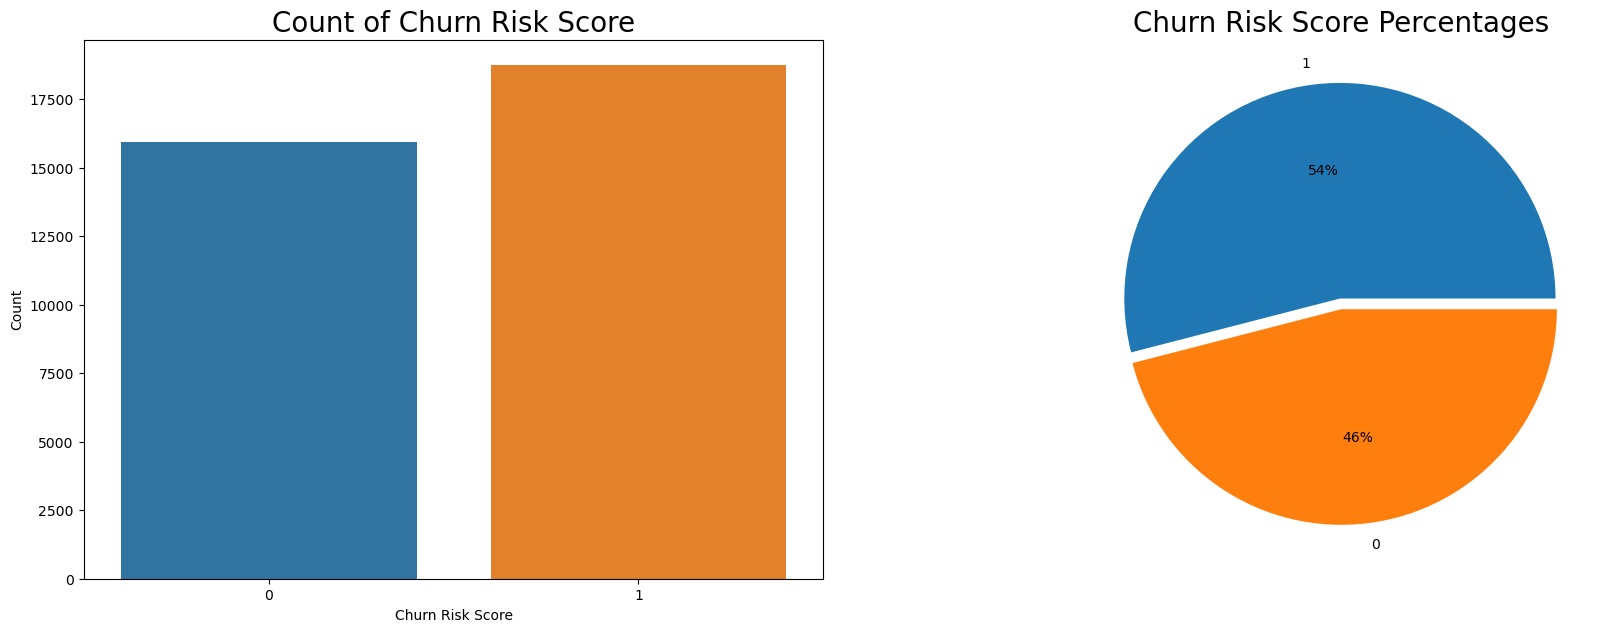

In [19]:
# defining the figure size

plt.figure(figsize = (21, 7))

# showing count plot for churn risk score

plt.subplot(1, 2, 1)
sns.countplot(x = 'churn_risk_score', data = df)
plt.title('Count of Churn Risk Score', fontsize = 20)
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')

# showing pie plot for churn risk score column

plt.subplot(1, 2, 2)
plt.pie(df['churn_risk_score'].value_counts(),labels = list(df['churn_risk_score'].value_counts().index),autopct = '%1.0f%%', explode=[0.05, 0])
plt.title('Churn Risk Score Percentages', fontsize = 20)

plt.show()

Churn refers to customers leaving a product or service. It's like water leaking from a bucket. The churn rate is the number of customers lost divided by the total number of customers. High churn is a problem as it means losing customers faster than gaining new ones. 

The data in the table indicates that <mark>more than half of the customers</mark>, approximately 54%, are <mark>likely to churn</mark>. This finding is <mark>not favorable for the business</mark>, as it suggests a majority of customers are at risk of leaving. In comparison, only 46% of customers are predicted to stay with the company. This stark difference highlights a concerning trend and emphasizes the urgency of addressing the churn issue. It is crucial for the business to take proactive measures to retain customers and ensure sustainable growth.

### iv.ii Gender

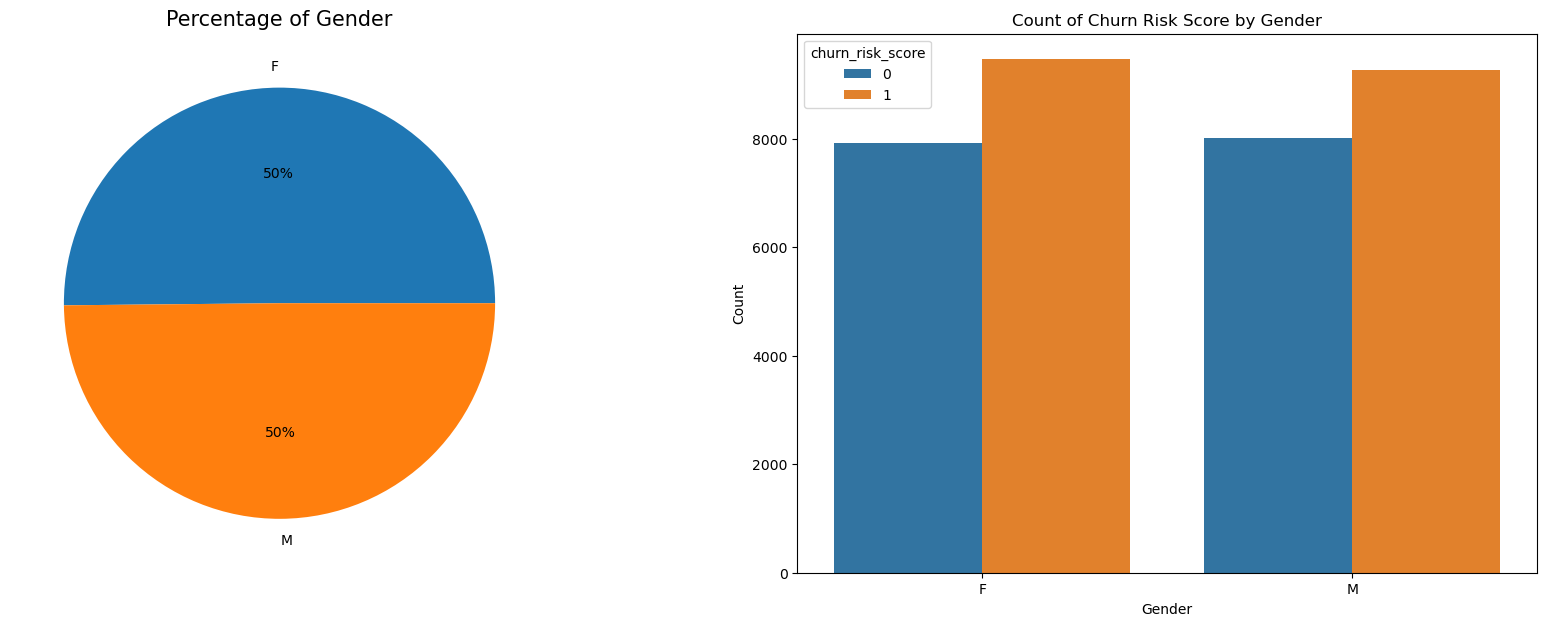

In [20]:
# defining the figure size

plt.figure(figsize=(21,7))

# pie chart of gender's percentage

plt.subplot(1, 2, 1)
plt.pie(df['gender'].value_counts(), labels = list(df['gender'].value_counts().index),autopct ='%1.0f%%')
plt.title('Percentage of Gender', fontsize = 15)

# count plot of gender by churn risk score

plt.subplot(1, 2, 2)
sns.countplot(x = 'gender', data = df, hue = 'churn_risk_score', order = df['gender'].value_counts().index)
plt.title('Count of Churn Risk Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

Based on the plots above, it is evident that the number of male and female customers is approximately <mark>equal</mark>, indicating a balanced gender distribution. Additionally, there seems to be <mark>no apparent correlation</mark> between gender and churn status. This suggests that churn rates are not significantly influenced by gender. Other factors such as `age`, `regional_category`, or interesting `membership_category` may have a stronger impact on customer churn.

### iv.iii Age

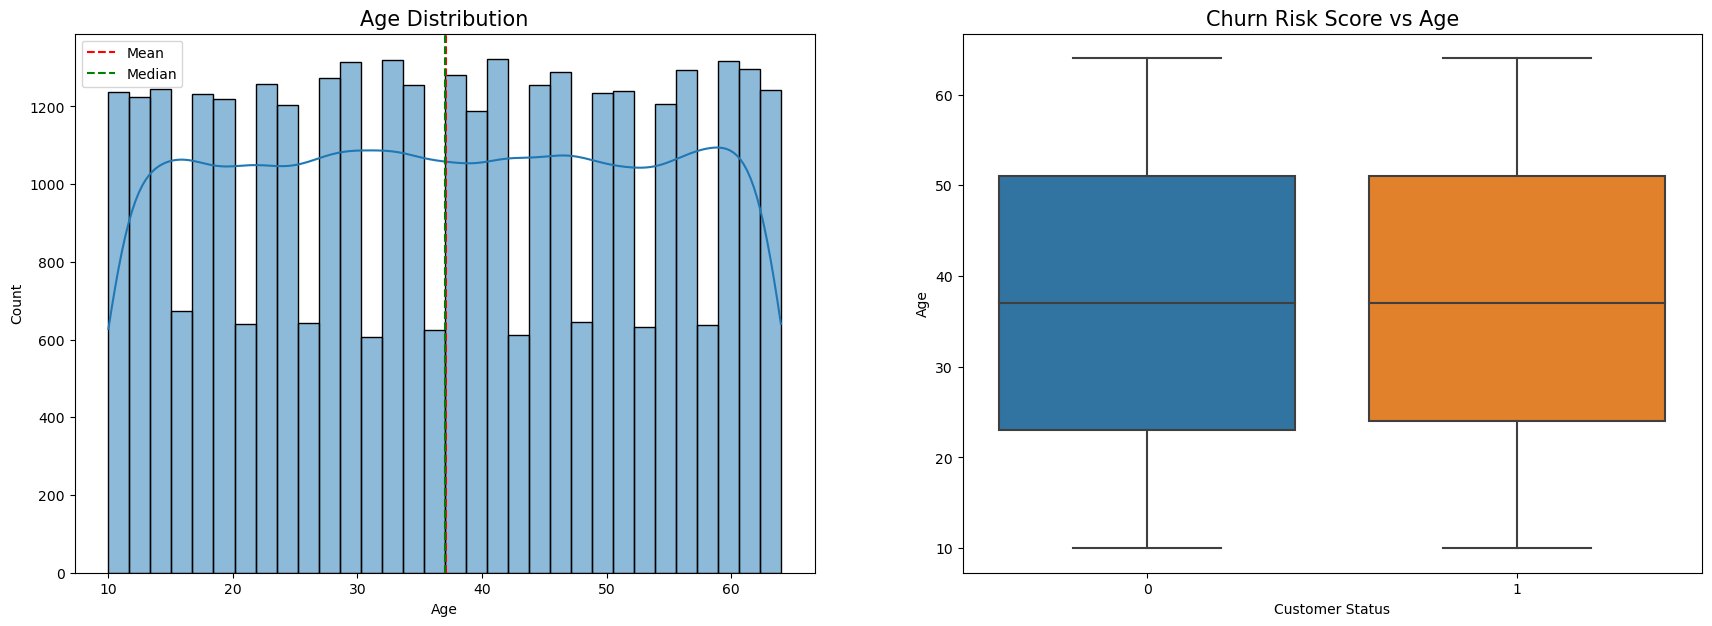

The skewness value of age column is: -0.005
The min value of age column is: 10
The max value of age column is: 64


In [21]:
# defining the figure size

plt.figure(figsize = (21, 7))

# histogram of age distrubution

plt.subplot(1, 2, 1)
sns.histplot(x = 'age', data = df, kde = True)
plt.axvline(df.age.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(df.age.median(), color = 'green', linestyle = '--', label = 'Median')
plt.title('Age Distribution', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# box plot for age vs churn risk score

plt.subplot(1, 2, 2)
sns.boxplot(x = 'churn_risk_score', y = 'age', data = df)
plt.title('Churn Risk Score vs Age', fontsize = 15)
plt.xlabel('Customer Status')
plt.ylabel('Age')

plt.show()

# checking skewness, min, and max values

print('The skewness value of age column is:', df.age.skew().round(3))
print('The min value of age column is:', df.age.min())
print('The max value of age column is:', df.age.max())

Based on the plot, the age of customers ranges from 10 to 64 years old. The data distribution in the age column is <mark>symmetrical</mark>, which means it's evenly spread out. The skewness value of -0.005 confirms this. It's interesting to note that there is <mark>no correlation between age and churn status</mark>. Young or old, the churn risk score is very similar.

### iv.iv Region Category

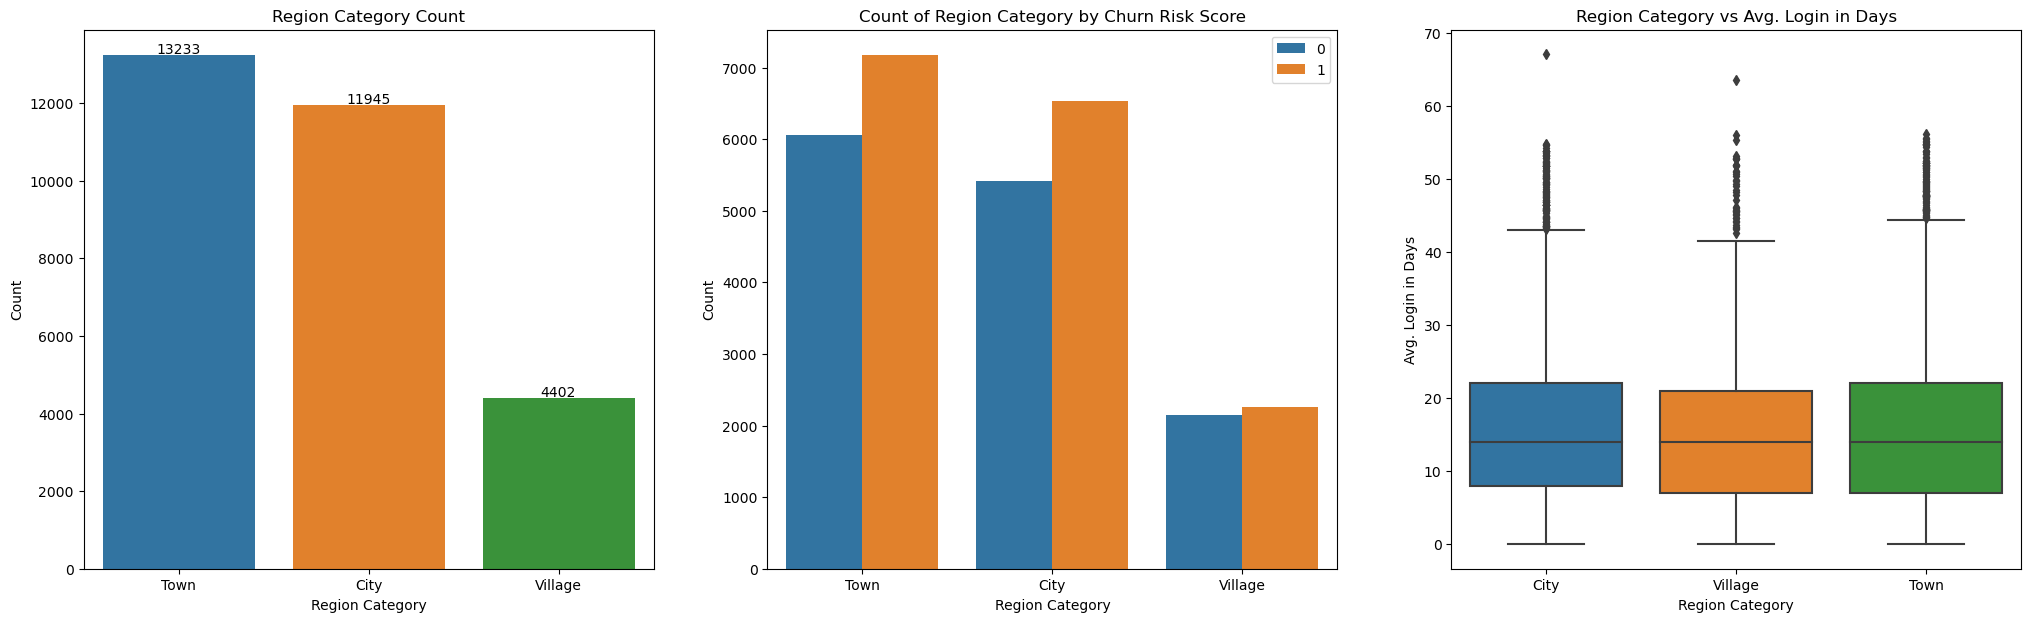

In [22]:
# defining the figure size

plt.figure(figsize = (25, 7))

# count plot of region category

plt.subplot(1, 3, 1)
fig = sns.countplot(x = 'region_category', data = df, order = df.region_category.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 50,
             '{:1.0f}'.format(height),
             ha = 'center')
plt.title('Region Category Count')
plt.xlabel('Region Category')
plt.ylabel('Count')

# count plot of region category by churn risk score

plt.subplot(1, 3, 2)
sns.countplot(x = 'region_category', data = df, hue = 'churn_risk_score', order = df['region_category'].value_counts().index)
plt.title('Count of Region Category by Churn Risk Score')
plt.xlabel('Region Category')
plt.ylabel('Count')
plt.legend(loc='upper right')

# box plot of region category by Avg. Login in Days

plt.subplot(1, 3, 3)
sns.boxplot(x = 'region_category', y = 'avg_frequency_login_days', data = df)
plt.title('Region Category vs Avg. Login in Days')
plt.xlabel('Region Category')
plt.ylabel('Avg. Login in Days')

plt.show()

The plots clearly show that <mark>most customers live in towns</mark>, with fewer residing in rural areas. However, regardless of the region (town, city, or village), the number of <mark>customers who churned is higher than those who stayed</mark>. This indicates a substantial issue with customer retention across all regions. Interestingly, despite variations in customer distribution among regions, the average frequency of logins per day remains relatively consistent.

### iv.v Tenure (Formerly Joining Date)

In [23]:
# transforming joining_date to tenure in month column

df['joining_date'] = pd.to_datetime(df['joining_date'])
today = datetime.datetime.now()
df['tenure'] = ((today - df['joining_date']) / pd.Timedelta(days=30)).astype(int)
df.drop('joining_date', axis=1, inplace=True)

# rearrange the dataframe

df = df[['age', 'gender', 'region_category', 'membership_category',
         'tenure', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score']]

df.head()

,age,gender,region_category,membership_category,tenure,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,75,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,75,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,76,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,90,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,100,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


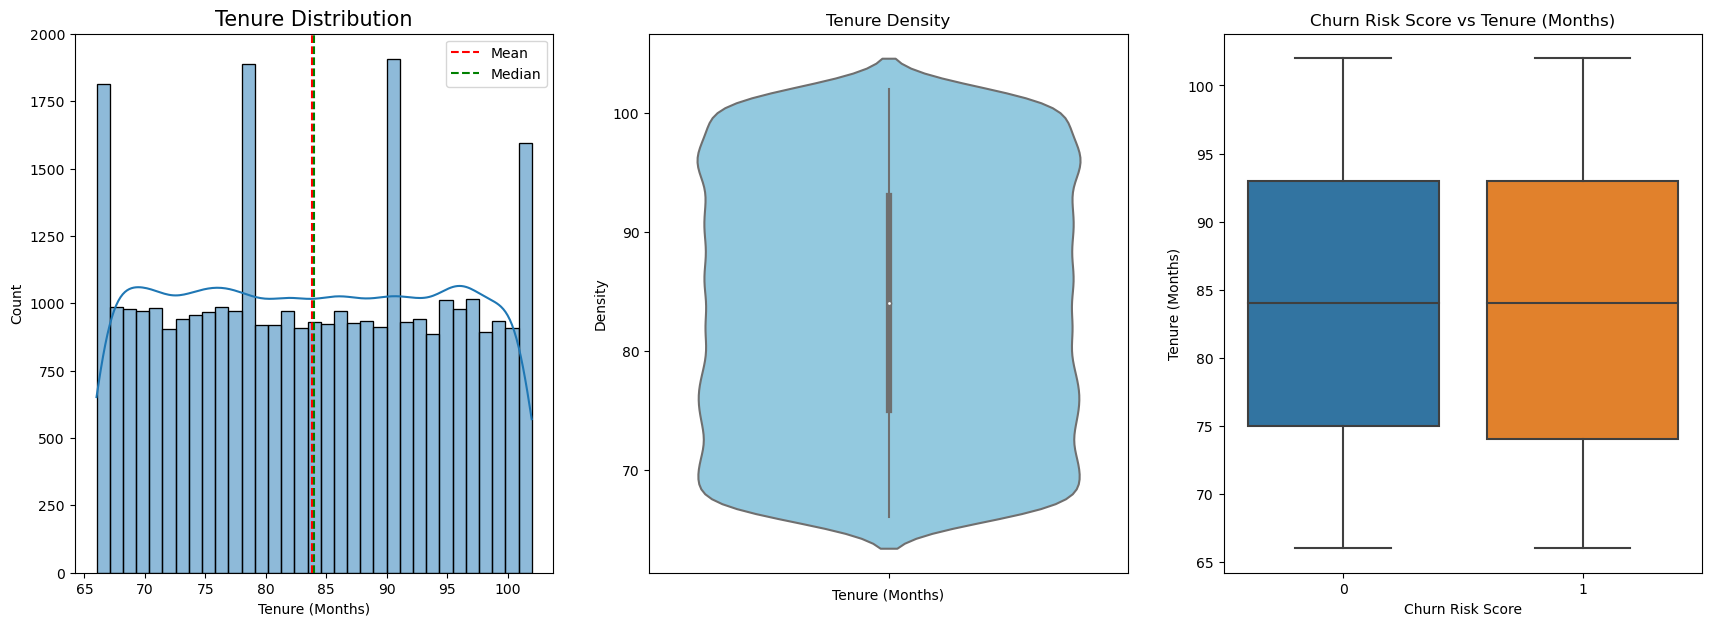

The skewness value of tenure column is: 0.009
The min value of tenure column is: 66
The max value of tenure column is: 102
The mean value of tenure column is: 84.0


In [24]:
# defining the figure size

plt.figure(figsize = (21, 7))

# histogram of tenure distrubution

plt.subplot(1, 3, 1)
sns.histplot(x = 'tenure', data = df, kde = True)
plt.axvline(df.tenure.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(df.tenure.median(), color = 'green', linestyle = '--', label = 'Median')
plt.title('Tenure Distribution', fontsize = 15)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend()

# violin plot for tenure

plt.subplot(1, 3, 2)
sns.violinplot(data = df, y = 'tenure', color='skyblue')
plt.title('Tenure Density')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')

# box plot of tenure by churn risk score

plt.subplot(1, 3, 3)
sns.boxplot(x = 'churn_risk_score', y = 'tenure', data = df)
plt.title('Churn Risk Score vs Tenure (Months)')
plt.xlabel('Churn Risk Score')
plt.ylabel('Tenure (Months)')

plt.show()

print('The skewness value of tenure column is:', df.tenure.skew().round(3))
print('The min value of tenure column is:', df.tenure.min())
print('The max value of tenure column is:', df.tenure.max())
print('The mean value of tenure column is:', df.tenure.mean().round(0))

Based on the plots, we can gather important insights about customer tenure. On <mark>average</mark>, customers have been with the company for approximately <mark>84 months</mark>. The <mark>newest customer</mark> joined <mark>65 months</mark> ago, while the <mark>oldest</mark> has been a customer for <mark>102 months</mark>. The distribution of tenure is <mark>symmetrical</mark>, with minimal skewness.

The violin plot reveals that <mark>tenure is evenly spread among customers</mark>, without any outliers. Interestingly, there is no correlation between tenure and churn risk score, referring to the box plot. Both new and long-standing customers have an equal likelihood of churning.

These findings emphasize that customer tenure alone is not a strong predictor of churn risk. Further analysis is needed to identify other influential factors in customer attrition.

### iv.vi Membership Category

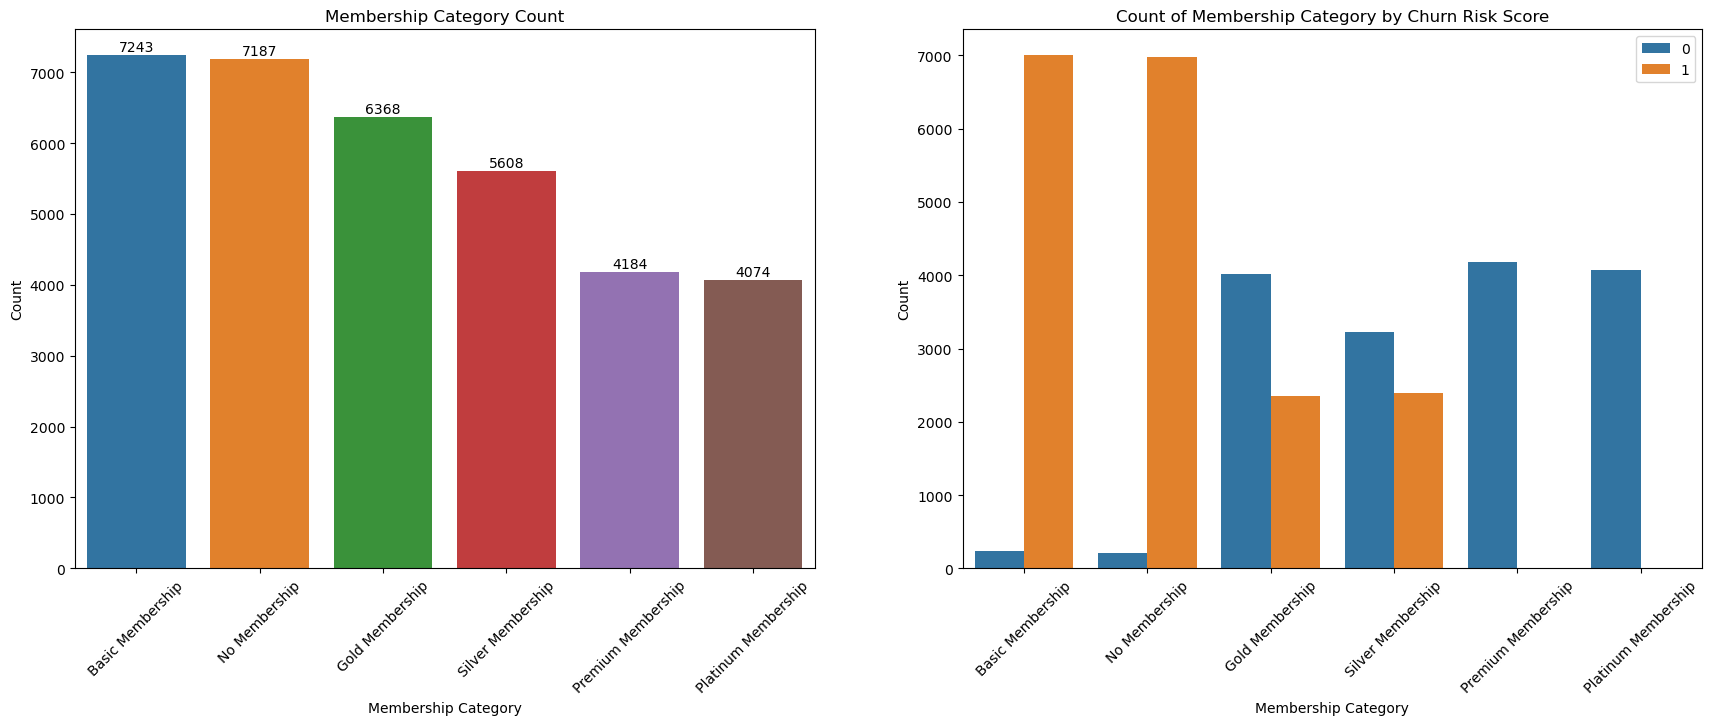

In [25]:
# defining the figure size

plt.figure(figsize = (21, 7))

# count plot of membership category

plt.subplot(1, 2, 1)
fig = sns.countplot(x = 'membership_category', data = df, order = df.membership_category.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 50,
             '{:1.0f}'.format(height),
             ha = 'center')
plt.title('Membership Category Count')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)

# count plot of membership category by churn risk score

plt.subplot(1, 2, 2)
sns.countplot(x = 'membership_category', data = df, hue = 'churn_risk_score', order = df['membership_category'].value_counts().index)
plt.title('Count of Membership Category by Churn Risk Score')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(loc='upper right')

plt.show()

The plot clearly illustrates the distribution of customer memberships. The <mark>majority of customers</mark> are subscribed to the <mark>basic membership or have no membership</mark> at all, while a <mark>smaller portion</mark> opt for <mrak>premium and platinum memberships</mark>.

Interestingly, the <mark>churn risk</mark> is significantly <mark>higher</mark> for customers with <mark>basic and no membership</mark>, with <mark>no instances of churn observed among premium and platinum members</mark>. Customers with gold and silver memberships also display a higher likelihood of staying rather than churning.

These findings highlight the <mark>crucial role</mark> of membership types in customer retention. It is vital to implement targeted strategies to reduce churn among basic and non-subscribed customers, while also leveraging the value of premium and platinum memberships to foster loyalty. Differentiated offerings and benefits tailored to each membership category can help optimize customer satisfaction and minimize churn risks.

### iv.vii Average Transaction Value

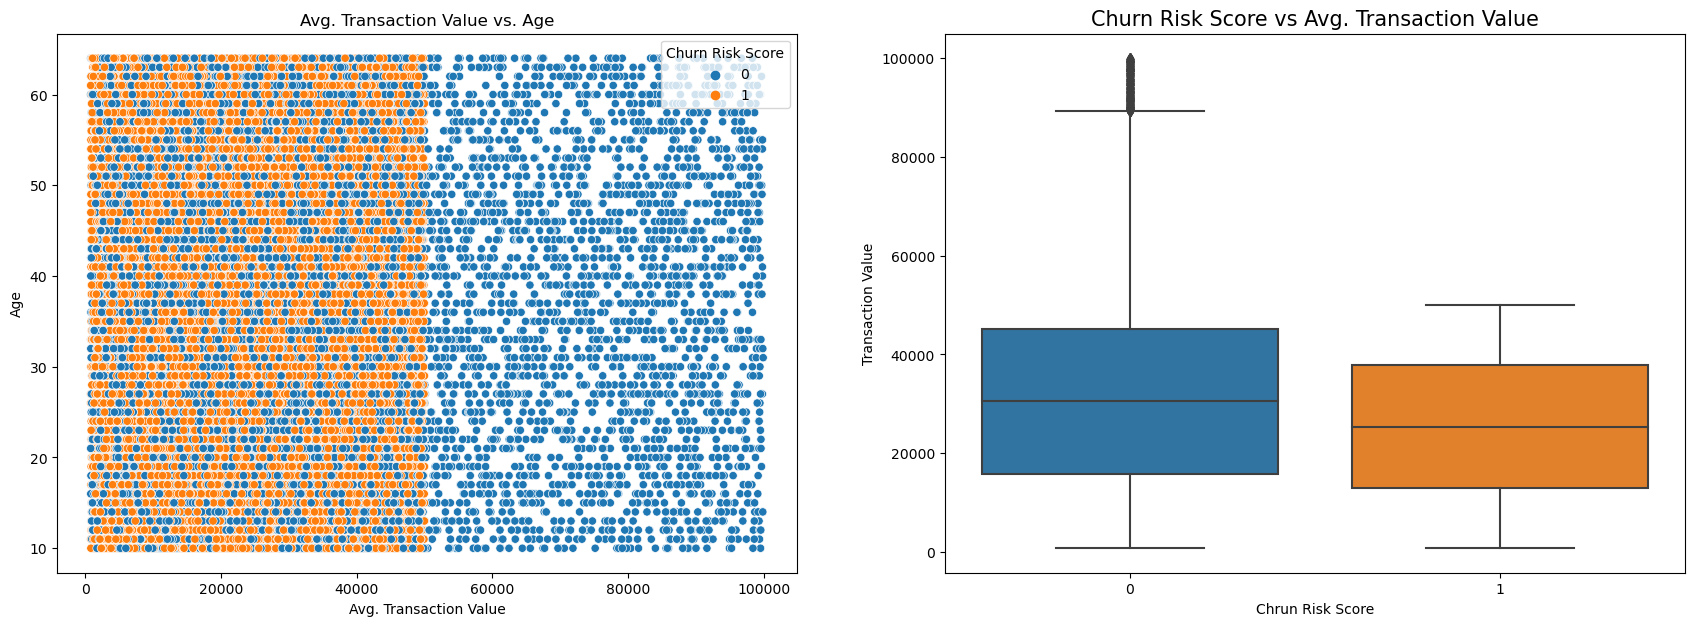

In [26]:
# defining the figure size

plt.figure(figsize = (21, 7))

# scatter plot for avg_transaction_value vs. age

plt.subplot(1, 2, 1)
sns.scatterplot(x = 'avg_transaction_value', y = 'age', hue = 'churn_risk_score', data = df)
plt.legend (title = 'Churn Risk Score', loc='upper right')
plt.title('Avg. Transaction Value vs. Age')
plt.xlabel('Avg. Transaction Value')
plt.ylabel('Age')

# box plot for chrun risk score vs avg. transaction value

plt.subplot(1, 2, 2)
sns.boxplot(x = 'churn_risk_score', y = 'avg_transaction_value', data = df)
plt.title('Churn Risk Score vs Avg. Transaction Value', fontsize = 15)
plt.xlabel('Chrun Risk Score')
plt.ylabel('Transaction Value')

plt.show()

The provided table reveals a <mark>notable correlation</mark> between <mark>average transaction value and churn risk score</mark>. It is evident that as the <mark>average transaction value increases</mark>, the likelihood of <mark>customer churn decreases</mark>. Notably, no customer churns above the 50k mark, indicating a strong association between higher transaction values and reduced churn risk.

This finding highlights the importance of transaction value as a predictive factor for customer churn. Businesses should focus on strategies that increase customer spending and average transaction values to enhance customer retention. By fostering higher-value transactions, companies can mitigate churn risks and foster long-term customer loyalty.

### iv.viii Feedback

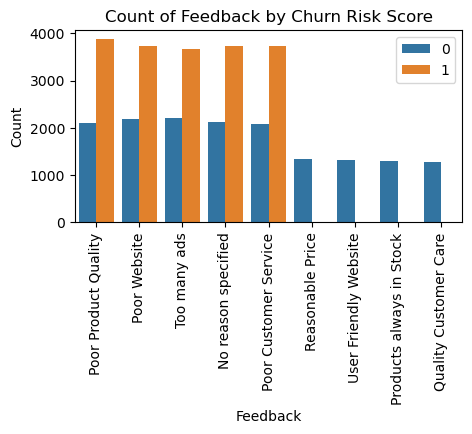

In [42]:
# showing count plot for feedback column

plt.figure(figsize = (5, 2.5))
sns.countplot(x = 'feedback', data = df, hue = 'churn_risk_score', order = df['feedback'].value_counts().index)
plt.title('Count of Feedback by Churn Risk Score')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.show()

### iv.ix Calculating Correlation for All the Columns

In [ ]:
# splitting the dataset into 2 parts in order make the correlation heat map easy to read

df_cor1 = df[['age', 'gender', 'region_category', 'membership_category',
            'tenure', 'joined_through_referral', 'preferred_offer_types',
            'medium_of_operation', 'internet_option', 'days_since_last_login',
            'churn_risk_score']].reset_index(drop = True)

df_cor2 = df.drop(columns=['age', 'gender', 'region_category', 'membership_category',
                            'tenure', 'joined_through_referral', 'preferred_offer_types',
                            'medium_of_operation', 'internet_option', 'days_since_last_login']).reset_index(drop = True)

interval columns not set, guessing: ['age', 'tenure', 'days_since_last_login', 'churn_risk_score']


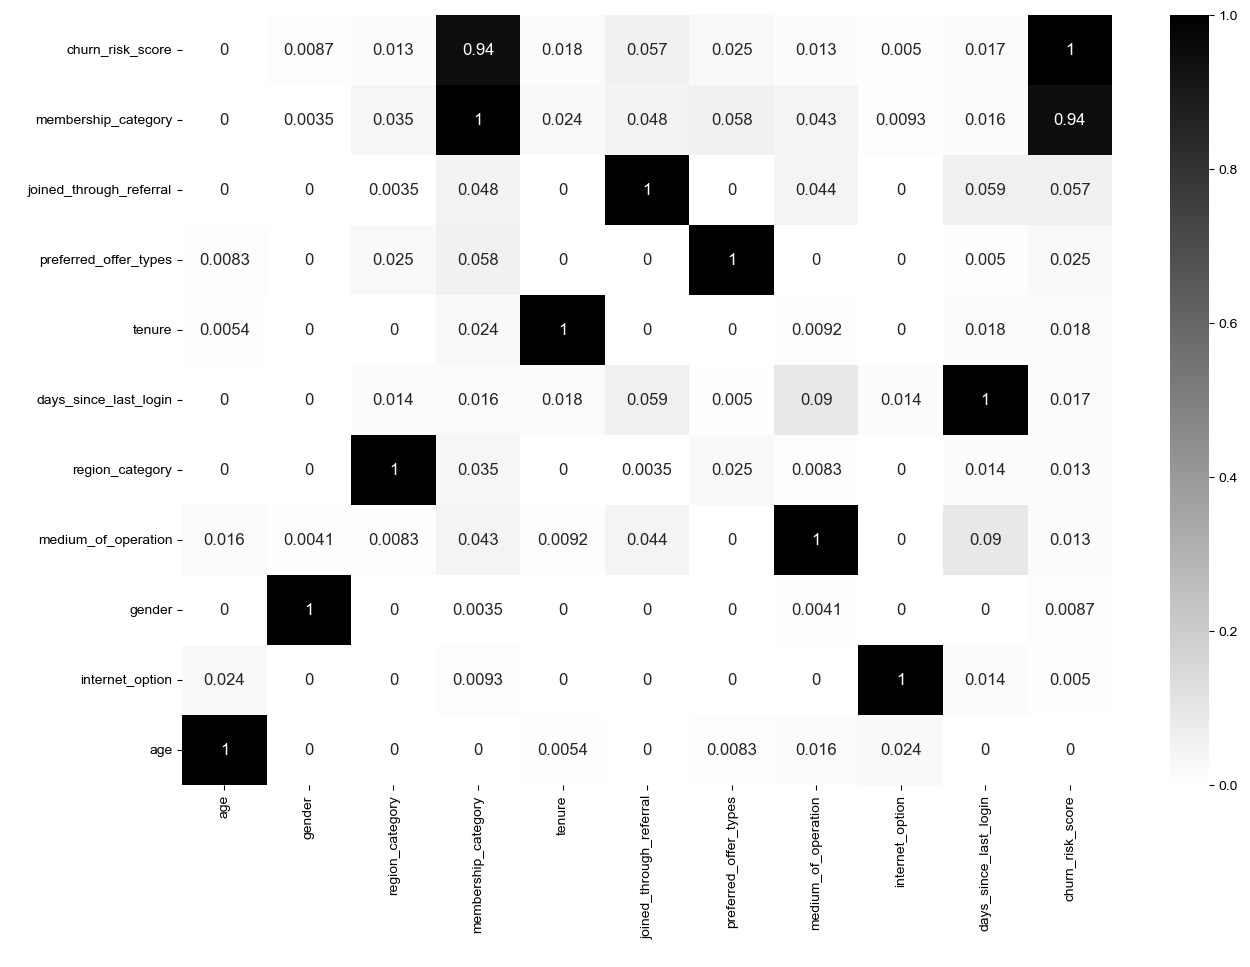

In [ ]:
# calculating correlation for the df_cln_cor1

cor_tbl_1 = df_cor1.phik_matrix()
cor_tbl_1.sort_values(by=['churn_risk_score'], ascending=False, inplace=True)

# showing heat map for the correlation table

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_1, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

interval columns not set, guessing: ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


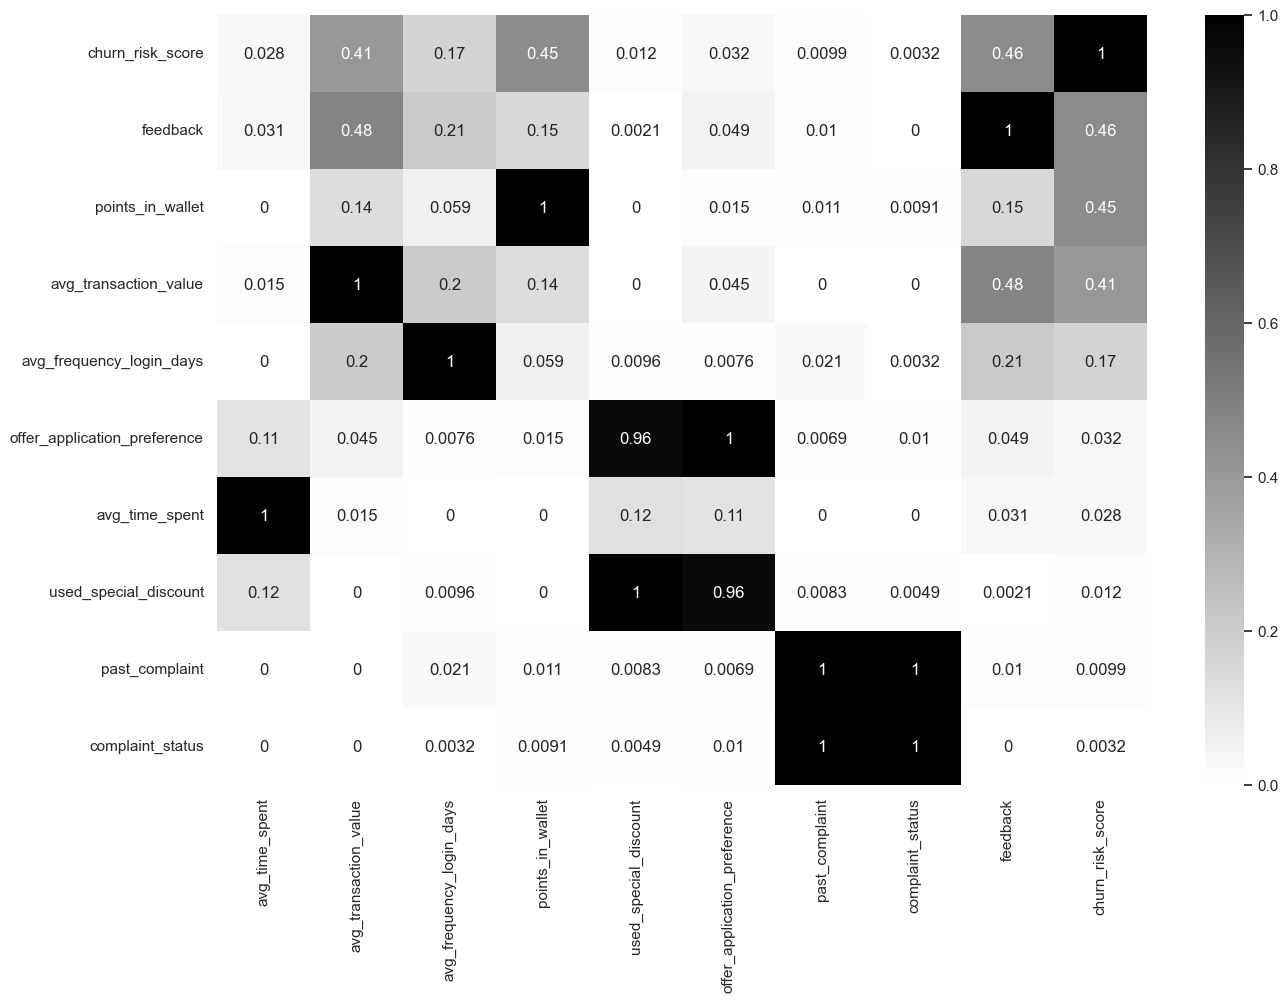

In [ ]:
# calculating correlation for the df_cln_cor2

cor_tbl_2 = df_cor2.phik_matrix()
cor_tbl_2.sort_values(by=['churn_risk_score'], ascending=False, inplace=True)

# showing heat map for the correlation table

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_2, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

Based on the heat map analysis, we have identified several columns with correlation values <mark>exceeding 15%</mark>. To streamline the dataset, we will drop irrelevant columns such as `age`, `gender`, `internet_option`, `used_special_discount`, and any other columns that have weak correlations with the target variable.

By removing these columns, we can focus on the more meaningful features that have a stronger relationship with the desired outcome. This will help simplify the dataset, reduce noise, and potentially improve the accuracy of our analysis or predictive models.

### iv.x Cardinality

The <mark>cardinality</mark> has been <mark>addressed in preceding sections</mark>, rendering the need to perform this step <mark>currently unnecessary</mark>.

## v. Feature Engineering

### v.i Saving Inference Data

In this section, we will save 200 sample data from the main dataset. We will use this data for inference process later after training and validating the model.

In [ ]:
# saving inference data

inference = df.sample(200, random_state = 42)
inference.to_csv('Customer Churn Prediction Inference - DL.csv', index=False)

# removing the sample data from the main data

df = df.drop(inference.index)

inference

,age,gender,region_category,membership_category,tenure,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
28637,40,M,Village,Basic Membership,93,NaN,Without Offers,Smartphone,Mobile_Data,14,58.00,47492.36,0.000000,687.810000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
14092,52,M,Town,Silver Membership,85,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,114.08,58489.33,36.534263,760.190000,No,Yes,No,Not Applicable,Reasonable Price,0
16329,18,F,Town,No Membership,70,Yes,Without Offers,Both,Wi-Fi,10,504.03,23021.27,0.000000,912.916761,Yes,Yes,Yes,No Information Available,Poor Customer Service,0
5763,53,M,NaN,Gold Membership,88,Yes,Without Offers,Smartphone,Mobile_Data,9,170.35,10308.71,21.000000,685.780000,No,Yes,No,Not Applicable,Poor Product Quality,0
2730,13,M,City,Silver Membership,87,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,4,150.97,85750.12,6.000000,785.690000,Yes,No,No,Not Applicable,Quality Customer Care,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,38,F,Town,Gold Membership,97,No,Without Offers,Desktop,Wi-Fi,15,31.21,21750.47,12.000000,332.356514,No,Yes,Yes,Solved in Follow-up,User Friendly Website,0
31799,51,M,Village,No Membership,85,NaN,Without Offers,Desktop,Wi-Fi,8,32.30,29686.22,9.000000,649.020000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
27750,17,F,City,No Membership,92,No,Gift Vouchers/Coupons,NaN,Mobile_Data,3,70.82,17759.00,11.000000,584.760000,No,Yes,Yes,Solved,No reason specified,1
3113,55,M,City,No Membership,70,Yes,Without Offers,NaN,Mobile_Data,10,30.54,13378.02,10.000000,678.720000,No,Yes,No,Not Applicable,Poor Website,1


### v.ii Spliting the Data

We will split the data into a training set (70%), a validation set (20%), and a testing set (10%).

In [ ]:
# spliting the train-set and test-set

X = df.drop('churn_risk_score', axis=1)
y = df.churn_risk_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

# checking the shape of train-set and test-set

for i in [X_train, X_val, X_test, y_train, y_val, y_test]:
    print(i.shape)

(24813, 19)
(6204, 19)
(3447, 19)
(24813,)
(6204,)
(3447,)


After we split the data, we can see that all the variables' rows and columns are the same. This indicates that the split process has finished without any problems.

### v.iii Feature Selection

In this section, we will carefully select the columns that will be included as features in our model. Based on the previous correlation calculations, we have identified several columns that need to be dropped due to their lack of significant correlation with the target variable or high correlation with other features. By eliminating these columns, we aim to improve the model's performance and avoid potential issues such as multicollinearity.

In [ ]:
# dropping unnecessary columns

X_train = X_train[['membership_category', 'feedback', 'points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days']]

X_val = X_val[['membership_category', 'feedback', 'points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days']]

X_test = X_test[['membership_category', 'feedback', 'points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days']]

In [ ]:
# showing the X_train values

X_train

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days
31363,No Membership,Poor Website,916.411944,34077.05,0.0
11180,Gold Membership,Reasonable Price,730.220000,77850.17,10.0
10773,Silver Membership,No reason specified,669.210000,7943.85,15.0
20762,Silver Membership,Poor Product Quality,446.922992,24493.62,18.0
29312,Gold Membership,Poor Website,744.300000,30837.10,5.0
...,...,...,...,...,...
29999,Premium Membership,Poor Product Quality,760.640000,38685.47,0.0
12934,No Membership,Poor Website,509.170000,23211.25,22.0
34203,Basic Membership,Poor Website,512.870000,33699.18,26.0
13593,Platinum Membership,Products always in Stock,754.790000,7053.74,9.0


In [ ]:
# showing the X_val values

X_val

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days
1571,Basic Membership,No reason specified,0.000000,6780.36,28.0
28910,Silver Membership,User Friendly Website,788.720000,19081.39,11.0
19331,Gold Membership,No reason specified,1097.865557,42093.46,7.0
33134,No Membership,Poor Product Quality,677.940000,38673.40,13.0
30125,Gold Membership,Too many ads,753.170000,3801.93,11.0
...,...,...,...,...,...
26650,Basic Membership,Poor Website,632.150000,37208.21,0.0
8153,Basic Membership,Poor Website,638.230000,1384.66,6.0
15763,Silver Membership,No reason specified,313.182020,26994.93,20.0
6063,Gold Membership,No reason specified,611.820000,3740.65,17.0


In [ ]:
# showing the X_test values

X_test

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days
13198,Platinum Membership,Products always in Stock,399.845484,15756.39,5.0
23874,Silver Membership,Too many ads,727.470000,9511.72,18.0
6027,Gold Membership,Poor Website,798.930000,24924.71,22.0
21195,No Membership,Poor Product Quality,512.190000,3054.90,24.0
25986,No Membership,Poor Product Quality,564.850000,45860.97,26.0
...,...,...,...,...,...
4075,Gold Membership,Poor Website,737.350000,32821.75,8.0
20374,No Membership,Poor Customer Service,701.230000,4253.63,0.0
21313,Basic Membership,No reason specified,649.830000,40636.31,22.0
15057,No Membership,No reason specified,688.610000,29194.81,19.0


### v.iv Missing Value Handling

In [ ]:
# checking missing value for X_train

X_train.isnull().sum()

membership_category         0
feedback                    0
points_in_wallet            0
avg_transaction_value       0
avg_frequency_login_days    0
dtype: int64

In [ ]:
# checking missing value for X_val

X_val.isnull().sum()

membership_category         0
feedback                    0
points_in_wallet            0
avg_transaction_value       0
avg_frequency_login_days    0
dtype: int64

In [ ]:
# checking missing value for X_test

X_test.isnull().sum()

membership_category         0
feedback                    0
points_in_wallet            0
avg_transaction_value       0
avg_frequency_login_days    0
dtype: int64

Initially, we believed that we needed to address the remaining missing values in this section. However, <mark>the columns containing missing values were dropped as part of the feature selection process</mark>. As a result, there is no need to handle missing values anymore in this section.

### v.v Outlier Handling

In this section, our objective is to identify outliers present in each numerical column of the dataset. We will adopt a specific approach to handle outliers by <mark>capping</mark> any values that fall below the <mark>15% threshold</mark> of the total data, if needed.

This will be achieved by implementing a pipeline to streamline the outlier detection and capping process. By applying this technique, we aim to mitigate the impact of outliers on our analysis and maintain data integrity within an acceptable range.

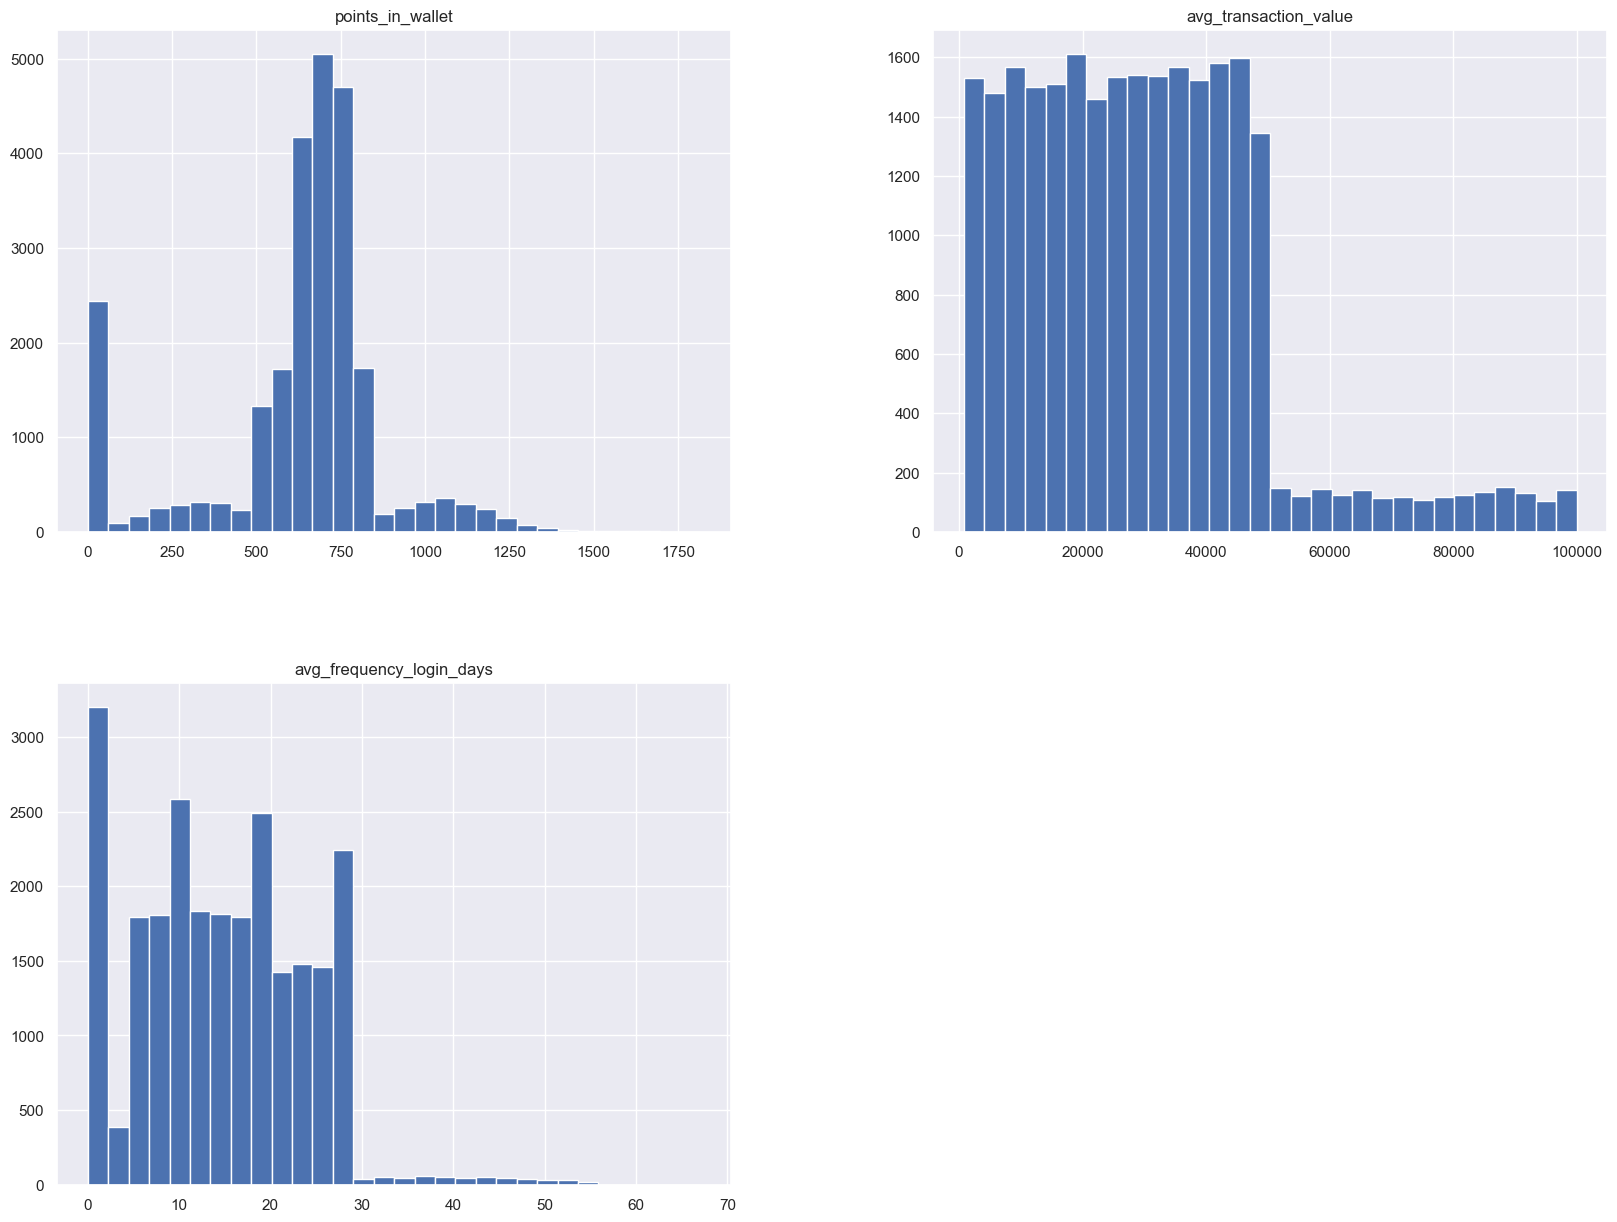

In [ ]:
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

In [ ]:
# making function for the outliers detection

def outlier_percent(X_train):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((X_train < minimum) | (X_train > maximum))
    num_total = X_train.count()
    return (num_outliers/num_total)*100

# printing how many percent of outliers in every numerical columns

for column in X_train.select_dtypes(include='number').columns:
    percent = str(round(outlier_percent(X_train[column]), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "points_in_wallet": 18.01%
Outliers in "avg_transaction_value": 3.03%
Outliers in "avg_frequency_login_days": 0.7%


Among the columns analyzed, only `points_in_wallet` has a percentage of outliers exceeding 15%. Therefore, we will handle this outliers with capping method later in the pipeline.

### v.vi Scaling Type Detection

In this section, our objective is to examine the distribution of each column within the dataset. By analyzing the distribution, we can determine the most suitable scaler to use for further data processing.

In [ ]:
# checking the skewness value in every numerical column

for skew in df.select_dtypes(include='number').columns:
    print(f'Skewness value in "{skew}": ', round(df[skew].skew(), 2))

Skewness value in "age":  -0.0
Skewness value in "tenure":  0.01
Skewness value in "days_since_last_login":  0.03
Skewness value in "avg_time_spent":  2.28
Skewness value in "avg_transaction_value":  1.01
Skewness value in "avg_frequency_login_days":  0.39
Skewness value in "points_in_wallet":  -0.78
Skewness value in "churn_risk_score":  -0.16


It was shown that most of the columns have low skew value, hence, we will use the <mark>StandardScaler</mark> for our scaler. 

<mark>StandardScaler</mark> is a preprocessing technique that standardizes numerical features by subtracting the mean and dividing by the standard deviation. It brings data to a common scale, preserving relationships while facilitating fair comparisons. This normalization step improves the performance and accuracy of machine learning models.

### vi.vii Dimention Reduction with Principal Component Analysis (PCA)

In this scenario, we employ Principal Component Analysis (PCA) as a dimensionality reduction technique. By setting the parameter `n_components` to <mark>0.9</mark>, we instruct PCA to automatically generate a sufficient number of <mark>Principal Components (PCs) that preserve 90% of the variance present in the dataset</mark>. This ensures that we retain the majority of the important information while reducing the dimensionality of the data.

By incorporating <mark>this step into our pipeline</mark>, we can effectively address the challenges posed by high-dimensional data and subsequently proceed with the modeling using Function and Sequential API.

### v.viii Making Pipeline and Tensorflow Pipeline (Extract, Transform, Load)

This is an attempt to create a pipeline to save time and effort. Automation is a powerful tool that can improve the efficiency and accuracy of our work. In this case, we are automating the process of handling outliers and scaling the data. This will help us to train more accurate models.

In [ ]:
# pipeline for numerical columns type

num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

num_tr = num_pipeline.fit_transform(X_train.select_dtypes(include='number'))

In [ ]:
# pipeline for categorical columns with One Hot Encoder

ohe_pipeline = Pipeline([
        ('ohe', OneHotEncoder(sparse=False)),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

ohe_tr = ohe_pipeline.fit_transform(X_train[['feedback']])

In [ ]:
# pipeline for categorical columns with Ordinal Encoder

mbr_order = ['Platinum Membership', 'Premium Membership', 'Gold Membership', 'Silver Membership', 'Basic Membership', 'No Membership']

ord_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder(categories=[mbr_order])),
        ('pca', PCA(n_components=.9, random_state = 42))
])

ord_tr = ord_pipeline.fit_transform(X_train[['membership_category']])

In [ ]:
# combining all scaling and encoding pipelines into one

preprocess = ColumnTransformer([
        ("num", num_pipeline, ['points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days']),
        ("ohe", ohe_pipeline, ['feedback']),
        ("ord", ord_pipeline, ['membership_category'])
    ])

In [ ]:
# making preprocessing pipeline with resampling

resample = Pipeline([   
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state = 42))
])

In [ ]:
# applying resampling to X_train and y_train

X_train_final, y_train_final = resample.fit_resample(X_train, y_train)

In [ ]:
# applying preprocessing to X_val

X_val_final = preprocess.transform(X_val)

In [ ]:
# applying preprocessing to X_test

X_test_final = preprocess.transform(X_test)

In [ ]:
# showing y_train value counts before resampling

y_train.value_counts()

1    13408
0    11405
Name: churn_risk_score, dtype: int64

In [ ]:
# showing y_train value counts after resampling

y_train_final.value_counts()

0    11405
1    11405
Name: churn_risk_score, dtype: int64

Next, we will make the Tensorflow pipeline or also known as <mark>Extract, Transform, Load (ETL)</mark>.

In [ ]:
# ETL for train-set

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).shuffle(6000).batch(32)

# ETL for val-set

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(32)

# ETL for test-set

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)

## vi. Model Definition

In this assignment, we are tasked to make Artificial Neural Network (ANN) models using <mark>Functional API</mark>, and <mark>Sequential API</mark>.

In [ ]:
# clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# create functional model

input_layer = Input(shape=(X_train_final.shape[1],))
hidden_layer_1 = Dense(2, activation='relu')(input_layer)
concat_layer = concatenate([input_layer, hidden_layer_1])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# create sequential model

model_sequential = Sequential()

model_sequential.add(Dense(2, activation='relu', input_shape=(X_train_final.shape[1],))) # input layer and hidden layer 1
model_sequential.add(Dense(1, activation='sigmoid')) # output layer

## vii. Model Training

In general, the purposes of training the model are to generalize well to new data, accurately predict or classify new data points, and enable decision-making. In this section, all baseline models will be trained.

In [ ]:
# compiling the functional model

model_functional.compile(loss = 'binary_crossentropy',
                         optimizer = 'nadam',
                         metrics = 'accuracy')

# training the functional model

history_func = model_functional.fit(train_dataset,
                                    epochs = 100,
                                    validation_data = val_dataset,
                                    verbose=0)

In [ ]:
# showing the functional model's summary

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            22          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 12)           0           ['input_1[0][0]',                
                                                                  'dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1)            13          ['concatenate[0][0]']        

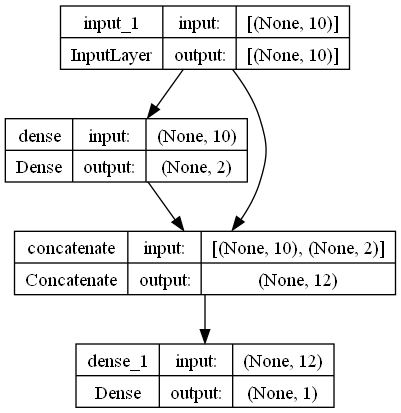

In [ ]:
# showing the functional model architecture

plot_model(model_functional, to_file='model_functional_architecture.png', show_shapes=True)

Layers and hyperparameters explanation for `Functional API`:

* **Input Layer**

It represents the input data that will be fed into the model. The input layer takes the shape of `X_train_final`.shape[1], which are our features for this case. The input layer has a shape of (None, 10), indicating that it expects input data with 10 features.

* **Hidden Layer 1**

It applies a linear transformation followed by the activation function to produce an output. It has 2 neurons and uses the `ReLU` (Rectified Linear Unit) activation. This layer is connected to the input layer. It produces an output shape of (None, 2).

* **Concatenate Layer**

It concatenates the outputs of both layers to create a single merged output. This layer combines the `input layer` and `hidden layer 1`. It has an output shape of (None, 12).

* **Output Layer**

It produces the final output of the model. It has 1 neuron and uses the `sigmoid` activation function. The input to this layer is the merged output from the concatenate layer earlier and it produces an output shape of (None, 1).

* **Model Compilation**

The binary `cross-entropy` loss function is used, which is suitable for binary classification problems. The `Nadam` optimizer is used, which is an extension of the `Adam` optimizer that combines `Nesterov` momentum and Adam adaptive learning rate. The `accuracy` metric is specified for evaluation.

* **Model Training**

The model is trained using the `fit` method. The `train_dataset` (from ETL) is provided as the training data. The number of training `epochs` is set to 100. The `val_dataset` (from ETL) is used for validation during training. The `verbose` parameter is set to 0, which means no progress updates are displayed during training.

* **Parameters**

The total number of `trainable params` in the model is 35, which are the ones that will be updated during training. While `non-trainable params` indicates the number of non-trainable parameters, which remain constant during training (such as in the case of frozen layers).

---

In [ ]:
# clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# compiling the sequential model

model_sequential.compile(loss='binary_crossentropy',
                         optimizer = 'adam',
                         metrics='accuracy')

# training the sequential model

history_seq = model_sequential.fit(train_dataset,
                                    epochs = 100,
                                    validation_data = val_dataset,
                                    verbose=0)

In [ ]:
# showing the sequential model's summary

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


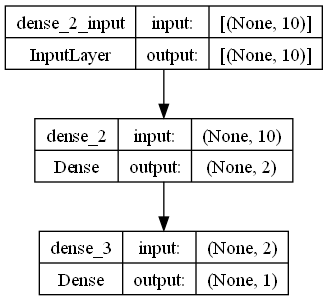

In [ ]:
# showing the sequential model architecture

plot_model(model_sequential, to_file='model_sequential_architecture.png', show_shapes=True)

Layers and hyperparameters explanation for `Functional API`:

* **Input Layer and Hidden Layer 1**

The first layer added to the model is a dense layer with 2 neurons and a `ReLU` activation function. It is also the `input layer` and expects input data with the shape of `X_train_final`.shape[1], which are our features for this case.  This layer produces an output shape of (None, 2).

* **Output Layer**

The second layer added is the `output layer`, which is also a dense layer. It has 1 neuron and uses the `sigmoid` activation function. It produces the final output of the model. This layer produces an output shape of (None, 1).

* **Model Compilation**

The binary `cross-entropy` loss function is used, which is suitable for binary classification problems. The `Adam` optimizer is used, known for its adaptive learning rate and efficient optimization. The `accuracy` metric is specified for evaluation.

* **Model Training**

The model is trained using the `fit` method. The `train_dataset` (from ETL) is provided as the training data. The number of training `epochs` is set to 100. The `val_dataset` (from ETL) is used for validation during training. The `verbose` parameter is set to 0, which means no progress updates are displayed during training.

* **Parameters**

The total number of `trainable params` in the model is 25, which are the ones that will be updated during training. While `non-trainable params` indicates the number of non-trainable parameters, which remain constant during training (such as in the case of frozen layers).

## viii. Model Evaluation

### viii.i Predict and Insightful Plots

In [ ]:
# creating dataFrame for functional model history in order to make it easy to plot

history_func_df = pd.DataFrame(history_func.history)
history_func_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.269832,0.848751,0.255948,0.868633
96,0.269598,0.848926,0.255855,0.868150
97,0.265717,0.854011,0.256898,0.872018
98,0.269139,0.852477,0.256763,0.869278
99,0.269636,0.852039,0.256308,0.868955


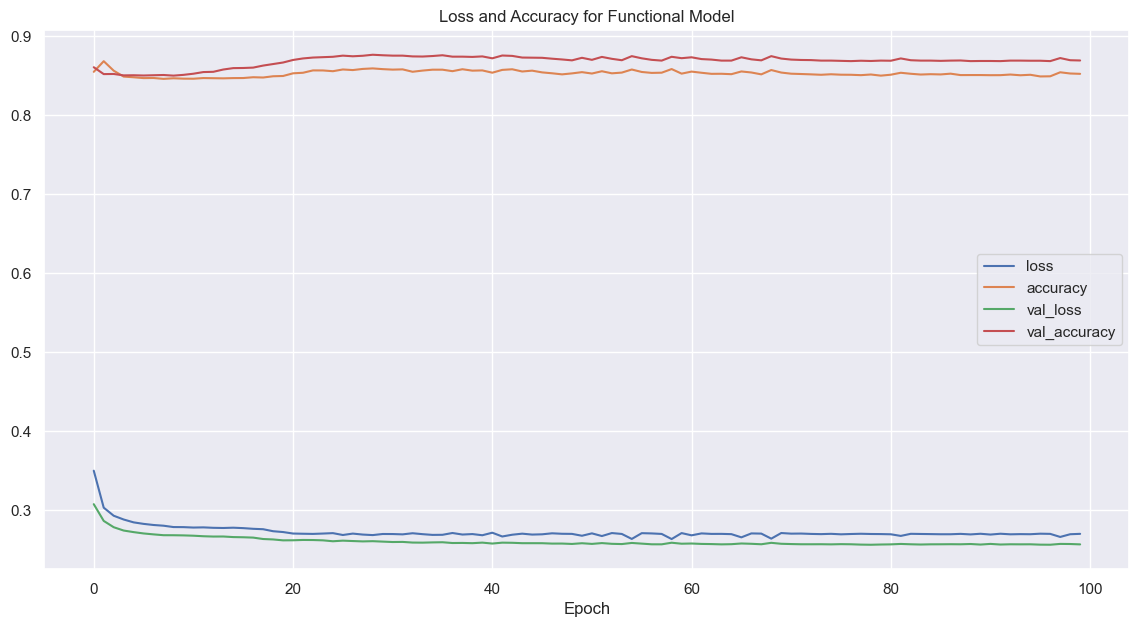

In [ ]:
# showing the loss and accuracy graph for functional model

history_func_df.plot(figsize=(14, 7))
plt.title('Loss and Accuracy for Functional Model')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# evaluate the functional model test-set

y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print('Classification report for Functional API model test-set:')
print(classification_report(y_test, y_pred_func))

108/108 [==============================] - 0s 2ms/step
Classification report for Functional API model test-set:
              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1584
           1       0.85      0.91      0.88      1863

    accuracy                           0.86      3447
   macro avg       0.87      0.86      0.86      3447
weighted avg       0.87      0.86      0.86      3447



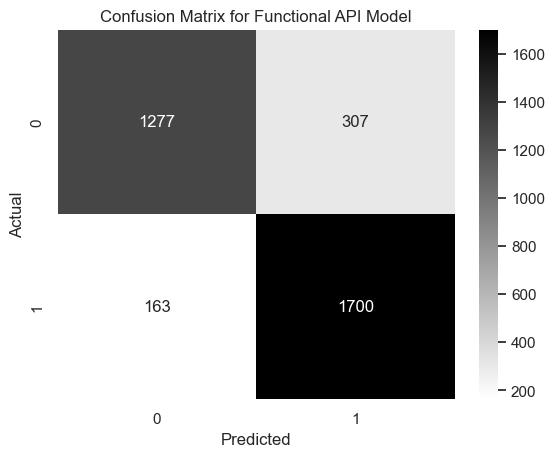

In [ ]:
# showing confusion matrix for functional model

cm_func = confusion_matrix(y_test, y_pred_func)
sns.heatmap(cm_func, annot=True, fmt="d", cmap="binary")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Functional API Model')
plt.show()

Based on the plot, the model appears to be a <mark>good fit</mark> as there is little gap between the loss and accuracy lines compared to their validation counterparts. The model achieves an <mark>accuracy score of around 86%</mark> and a <mark>loss of approximately 26%</mark>. After around <mark>50 epochs</mark>, both the <mark>loss and accuracy stabilize</mark>.

In this case, we prioritize the <mark>recall</mark> metric to <mark>minimize false negatives</mark>. The classification report indicates a <mark>recall score of 0.81 for class 0</mark>. Unfortunately, the model produces <mark>163 false negatives, which is undesirable</mark>. To address this, we will focus on improving the model in the next section by adjusting the layers and hyperparameters.

---

In [ ]:
# creating dataFrame for sequential model history in order to make it easy to plot

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.274974,0.870934,0.288334,0.857995
96,0.275897,0.869356,0.287205,0.856867
97,0.274984,0.869136,0.288925,0.859446
98,0.275152,0.869750,0.288144,0.860413
99,0.275870,0.870013,0.286918,0.858156


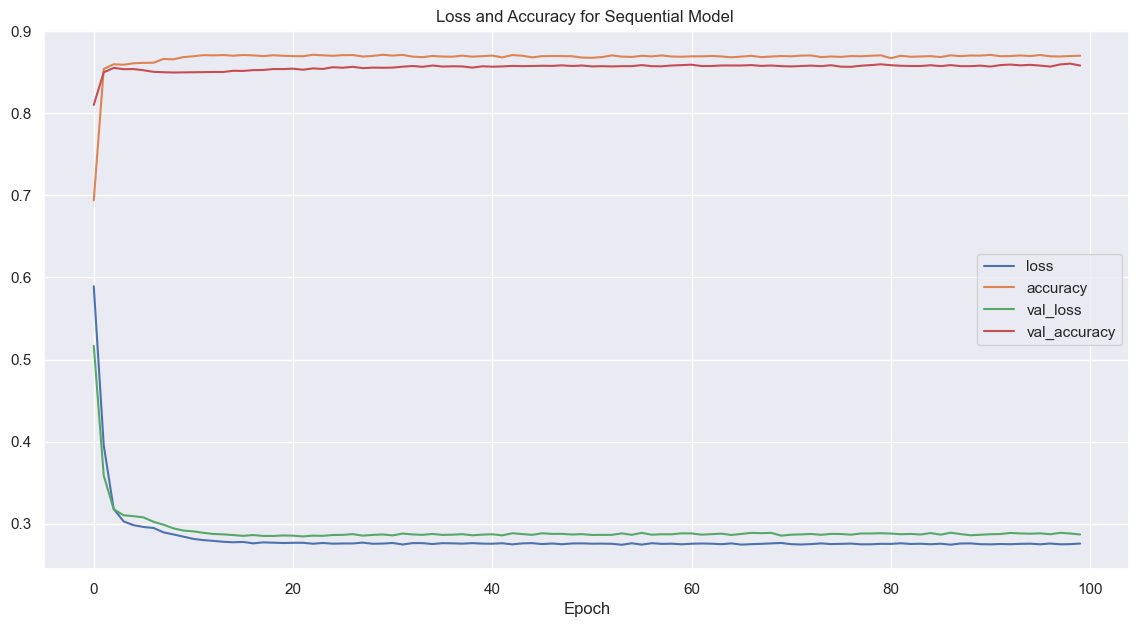

In [ ]:
# showing the loss and accuracy graph for sequential model

history_seq_df.plot(figsize=(14, 7))
plt.title('Loss and Accuracy for Sequential Model ')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# evaluate the sequential model test-set

y_pred_seq = model_sequential.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print('Classification report for Sequential API model test-set:')
print(classification_report(y_test, y_pred_seq))

108/108 [==============================] - 0s 2ms/step
Classification report for Sequential API model test-set:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1584
           1       0.84      0.90      0.87      1863

    accuracy                           0.86      3447
   macro avg       0.86      0.85      0.85      3447
weighted avg       0.86      0.86      0.85      3447



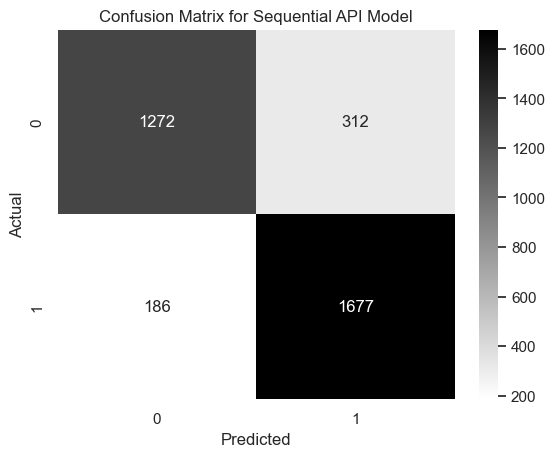

In [ ]:
# showing confusion matrix for sequential model

cm_seq = confusion_matrix(y_test, y_pred_seq)
sns.heatmap(cm_seq, annot=True, fmt="d", cmap="binary")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sequential API Model')
plt.show()

In terms of the `Sequential API` model, it is considered a <mar>good fit</mark> as well as there is a small gap between the loss and accuracy lines compared to their validation counterparts. The model achieves an <mark>accuracy score of around 86% and a loss of approximately 28%</mark>. This <mark>stability</mark> in performance is reached <mark>after about 50 epochs</mark>.

In this case, the focus is on the <mark>recall metric to minimize false negatives</mark>. The classification report indicates a <mark>recall score of 0.80 for class 0</mark>. However, the model produces <mark>186 false negatives, which is undesirable</mark>. To address this, the next step involves improving the model by adjusting the layers and hyperparameters.

---

### viii.ii Models Improvement

Next, we will focus on improving the `Functional` and `Sequential APIs` by fine-tuning their <mark>layers</mark> and <mark>hyperparameters</mark>. Our objective is to enhance the models' performance and achieve better accuracy and predictive capabilities. By making strategic adjustments to the architecture and hyperparameters, we aim to optimize their effectiveness.

In [ ]:
# clear session

tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# creating the improved functional model

input_layer_imp = Input(shape=(X_train_final.shape[1],))
hidden_layer_1_imp = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer_imp)
dropout_layer_1_imp = Dropout(0.3)(hidden_layer_1_imp)
hidden_layer_2_imp = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout_layer_1_imp)
concat_layer_imp = concatenate([input_layer_imp, hidden_layer_2_imp])
output_layer_imp = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer_imp)

model_functional_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# compiling the improved functional model

model_functional_imp.compile(loss = 'binary_crossentropy',
                         optimizer = Adam(learning_rate = 0.001),
                         metrics = 'accuracy')

# training the improved functional model

history_func_imp = model_functional_imp.fit(train_dataset,
                                    epochs = 50,
                                    validation_data = val_dataset,
                                    verbose=0)

In [ ]:
# showing the improved functional model's summary

model_functional_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           176         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 16)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 16)           272         ['dropout[0][0]']                
                                                                                              

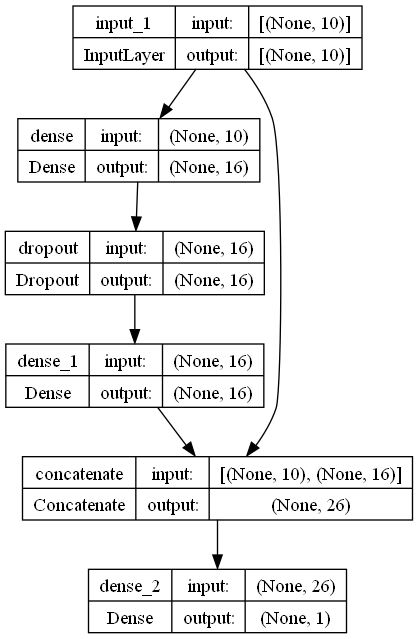

In [ ]:
# showing the improved functional model architecture

plot_model(model_functional_imp, to_file='model_functional_imp_architecture.png', show_shapes=True)

In [ ]:
# creating dataFrame for improved functional model history in order to make it easy to plot

history_func_imp_df = pd.DataFrame(history_func_imp.history)
history_func_imp_df.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.142807,0.945945,0.207765,0.921825
46,0.144852,0.944060,0.203746,0.922469
47,0.150092,0.944542,0.202216,0.923114
48,0.144902,0.944410,0.197594,0.923920
49,0.147715,0.944805,0.202939,0.923920


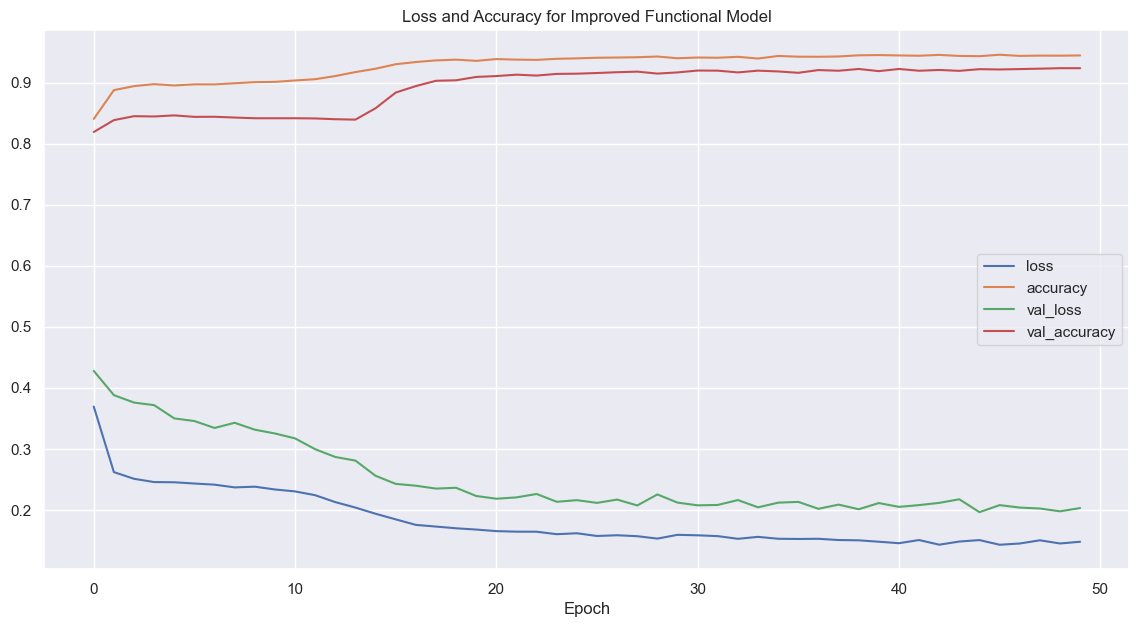

In [ ]:
# showing the loss and accuracy graph for improved functional model

history_func_imp_df.plot(figsize=(14, 7))
plt.title('Loss and Accuracy for Improved Functional Model')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# evaluate the improved functional model test-set

y_pred_func_imp = model_functional_imp.predict(X_test_final)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print('Classification report for Improved Functional API model test-set:')
print(classification_report(y_test, y_pred_func_imp))

108/108 [==============================] - 0s 1ms/step
Classification report for Improved Functional API model test-set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1584
           1       0.88      1.00      0.93      1863

    accuracy                           0.92      3447
   macro avg       0.94      0.92      0.92      3447
weighted avg       0.93      0.92      0.92      3447



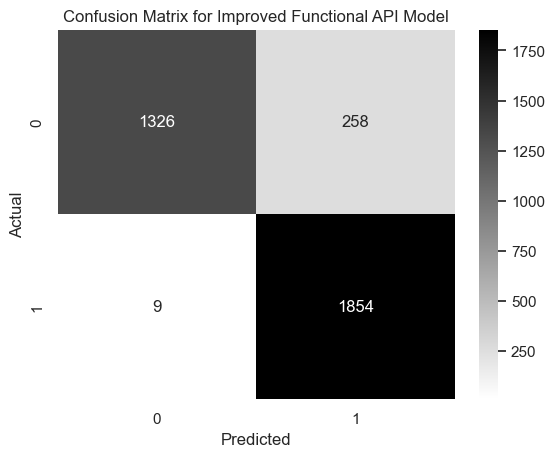

In [ ]:
# showing confusion matrix for improved functional model

cm_func_imp = confusion_matrix(y_test, y_pred_func_imp)
sns.heatmap(cm_func_imp, annot=True, fmt="d", cmap="binary")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Improved Functional API Model')
plt.show()

The <mark>initial functional</mark> model consists of a simple architecture with <mark>one hidden layer comprising 2 neurons</mark>. It is trained for <mark>100 epochs</mark> using the <mark>Nadam optimizer</mark>. In contrast, the <mark>improved functional model</mark> incorporates enhancements. It includes <mark>two hidden layers, each with 16 neurons, and utilizes dropout regularization</mark>. The architecture is <mark>initialized with HeNormal and GlorotNormal weight initializers</mark>. Additionally, the <mark>improved model</mark> is trained for <mark>50 epochs using the Adam optimizer</mark> with a learning rate of 0.001.

The differences made in the improved model aim to increase its complexity and capacity to capture more intricate patterns in the data. By introducing additional layers, employing dropout regularization, and utilizing different weight initializers, the model is expected to exhibit improved performance and generalization. <mark>Training for fewer epochs in the improved model helps prevent overfitting and ensures a more efficient training process</mark>.

The improved functional model also exhibits a <mark>good-fit</mark>, with a small gap between the loss and accuracy curves and their validation counterparts, similar to the initial model. However, the improved model <mark>shows notable advancements in accuracy and loss scores</mark>. It achieves an impressive accuracy of 92% and reduces the loss to 20%, surpassing the pre-tuning scores of 85% and 26% respectively.

Additionally, the <mark>recall score for class 0 sees improvement from 0.81 to 0.84</mark>. Most notably, the number of <mark>false negatives is significantly reduced to only 9</mark>, a substantial improvement compared to the initial model's 163 false negatives. This signifies a marked enhancement in the model's ability to correctly identify instances of class 0, which is highly valuable for accurate predictions.

---

In [ ]:
# clear session

tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# creating the improved sequential model

model_sequential_imp = Sequential()
model_sequential_imp.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed), input_shape=(X_train_final.shape[1],))) # hidden layer 1
model_sequential_imp.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))) # hidden layer 2
model_sequential_imp.add(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # output layer

# compiling the improved sequential model

model_sequential_imp.compile(loss = 'binary_crossentropy',
                         optimizer = Nadam(learning_rate = 0.001),
                         metrics = 'accuracy')

# training the improved sequential model

history_seq_imp = model_sequential_imp.fit(train_dataset,
                                    epochs = 50,
                                    validation_data = val_dataset,
                                    verbose=0)

In [ ]:
# showing the improved sequential model's summary

model_sequential_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


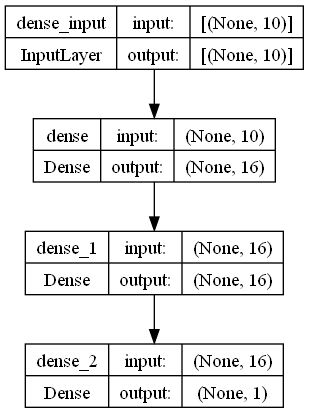

In [ ]:
# showing the improved sequential model architecture

plot_model(model_sequential_imp, to_file='model_sequential_imp_architecture.png', show_shapes=True)

In [ ]:
# creating dataFrame for improved sequential model history in order to make it easy to plot

history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.118806,0.953924,0.199662,0.923598
46,0.116587,0.955414,0.202410,0.925532
47,0.118097,0.955502,0.198811,0.923436
48,0.119903,0.954625,0.183872,0.926499
49,0.118746,0.954538,0.196830,0.926177


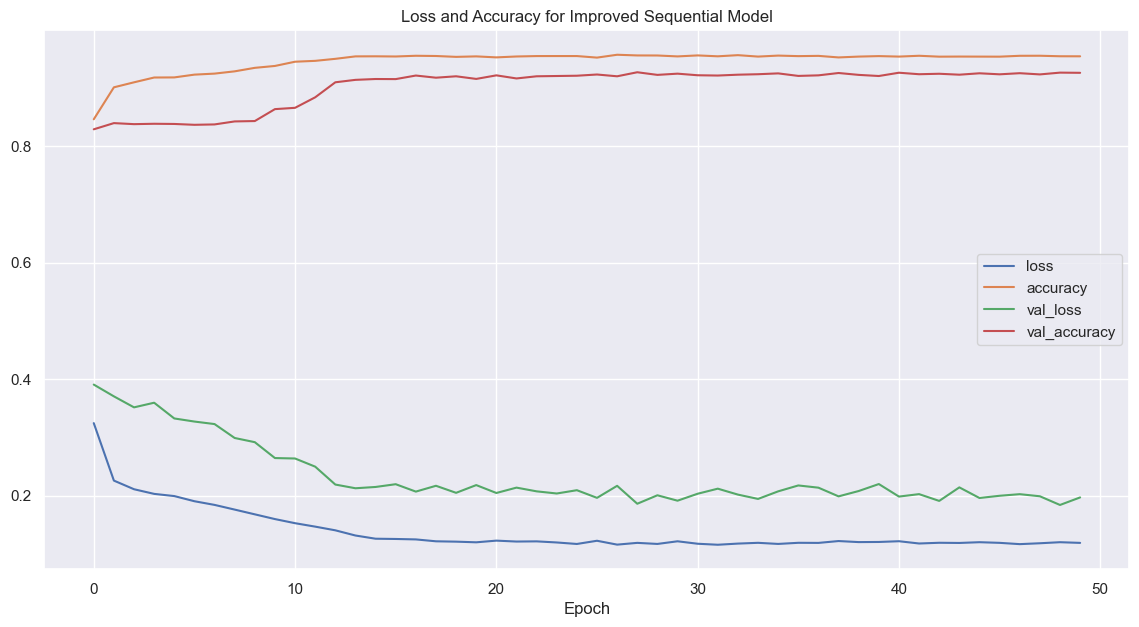

In [ ]:
# showing the loss and accuracy graph for improved sequential model

history_seq_imp_df.plot(figsize=(14, 7))
plt.title('Loss and Accuracy for Improved Sequential Model')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# evaluate the improved sequential model test-set

y_pred_seq_imp = model_sequential_imp.predict(X_test_final)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print('Classification report for Improved Sequential API model test-set:')
print(classification_report(y_test, y_pred_seq_imp))

108/108 [==============================] - 0s 2ms/step
Classification report for Improved Sequential API model test-set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1584
           1       0.88      0.99      0.93      1863

    accuracy                           0.93      3447
   macro avg       0.94      0.92      0.92      3447
weighted avg       0.93      0.93      0.92      3447



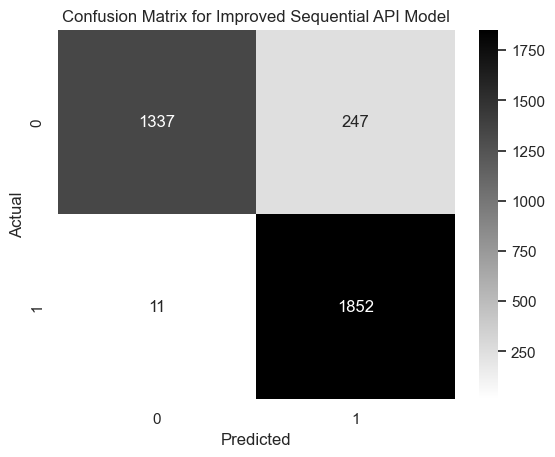

In [ ]:
# showing confusion matrix for improved sequential model

cm_seq_imp = confusion_matrix(y_test, y_pred_seq_imp)

sns.heatmap(cm_seq_imp, annot=True, fmt="d", cmap="binary")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Improved Sequential API Model')
plt.show()

The <mark>initial sequential</mark> model consists of <mark>one hidden layer with 2 neurons, followed by an output layer</mark>. It is trained for <mark>100 epochs</mark> using the <mark>Adam optimizer</mark>. On the other hand, the <mark>improved sequential model</mark> incorporates enhancements by <mark>introducing two hidden layers, each with 16 neurons</mark>. It also <mark>utilizes different weight initializers to initialize the model's parameters</mark>. The <mark>improved model</mark> is trained for <mark>50 epochs using the Nadam optimizer</mark> with a learning rate of 0.001.

The differences made in the improved sequential model aim to increase its capacity to capture more complex patterns in the data. By adding additional layers and using different weight initializers, the model gains more representational power. <mark>Training for a shorter duration in the improved model helps prevent overfitting and improves computational efficiency</mark>.

The improvements made in the model result in enhanced performance. The improved sequential model achieves an <mark>accuracy of 93% and reduces the loss to 20%</mark>, surpassing the initial model's accuracy of 86% and loss of 28%. Furthermore, the <mark>recall score for class 0 improves from 0.80 to 0.84</mark>. The number of <mark>false negatives is significantly reduced to 11</mark>, compared to the initial model's 186 false negatives. This improvement demonstrates the model's enhanced ability to correctly identify instances of class 0. And this improved sequential model appears to have a <mark>good statistical fit as well</mark>, looking at the small gap between the loss and accuracy curves and their validation counterparts.

After thorough evaluation and analysis of various metrics and results, we have concluded that the <mark>Improved Functional API</mark> model will be the <mark>preferred choice for inference and deployment</mark>. While the <mark>Improved Sequential API model exhibits a higher accuracy score, the Improved Functional API model outperforms in terms of reducing false negatives</mark>. Both models have demonstrated excellent performance from different perspectives and metrics, but ultimately, a decision must be made, and the improved functional API model emerges as the winner based on its ability to minimize false negatives.

---

## ix. Model Saving

In this session, we will save all the needed files so that we can run the model inference and deployment flawlessly and efficiently.

In [ ]:
# save the model

model_functional_imp.save('model.h5')

# save preprocessing pipeline

pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

## x. Model Inference

Model Inference will be done in the other notebook in order to avoid any errors, and it is an attempt to get as accurate results as possible.

## xi. Conclusion

<mark>Churn</mark> refers to <mark>customers leaving a product or service</mark>, and a high churn rate can be problematic. The <mark>EDA reveals important insights about customer churn and its factors</mark>. More than half of the customers (54%) are likely to churn, posing a challenge. Gender doesn't strongly influence churn. Age and region have no significant correlation with churn. Tenure alone is not a predictor of churn. Membership type is crucial, with basic/non-subscribed customers having higher churn risk. Higher average transaction values are associated with lower churn risk. Businesses should focus on tailored retention strategies and increasing transaction values to enhance loyalty and reduce churn.

The evaluation <mark>metric score</mark> used in this case is <mark>recall</mark>, which measures the proportion of true positive predictions out of all actual positive instances. Recall is valuable when the objective is to <mark>minimize false negatives</mark> and ensure all positive instances are identified. For example, if we predict that a particular person is going to stay, but in reality that person is leaving the subscription, this is what we call a false negative in our case, and we want to minimize this case as much as possible because it could impact the business in a bad way. The <mark>possible losses</mark> that can occur if we predict the default payment wrongly are: missed retention opportunities, customer dissatisfaction, wasted resources, lost revenue, and reputation damage.

Both the <mark>Functional and Sequential models, both before and after improvement, exhibit a good fit</mark> with minimal gap between the loss and accuracy curves and their respective validation curves. <mark>Initially trained for 100 epochs, it was observed that stability was reached around 50 epochs for both models</mark>. Consequently, the improved models were trained for only 50 epochs, reducing the risk of overfitting and significantly reducing training time.

Following the <mark>tuning of layers and hyperparameters, both models demonstrated overall improvement, particularly in the crucial aspect of minimizing false negatives</mark>. The decision of choosing the model for inference and deployment proved challenging due to their similar performance. Ultimately, the <mark>Improved Functional API</mark> model was selected for its <mark>superior ability to filter out more false negatives</mark> compared to the Improved Sequential API model.

The <mark>strength</mark> of our model is effective in handling complex data. Deep learning models in general performs well when dealing with high-dimensional data or datasets with complex decision boundaries. It can effectively capture non-linear relationships and patterns, making it suitable for churn prediction tasks where the relationships between features and churn can be intricate, which will benefit the company tremendously.

One of the <mark>weakness</mark> faced in our model is its sensitivity to hyperparameters. The performance of deep learning models is heavily influenced by the selection of layers and hyperparameters, including the number of neurons, architectural choices, kernel selection, optimizer choice, and more. Improper tuning of these components can lead to suboptimal performance or overfitting. Therefore, achieving optimal results necessitates careful optimization, deep domain knowledge, and expertise from professionals to effectively configure and run the model.

In order to further improve our models for churn prediction, several strategies can be applied. First, <mark>feature engineering</mark> plays a crucial role in selecting and engineering relevant features that capture customer behavior and demographics. Additionally, <mark>data preprocessing</mark> steps such as cleansing, handling missing values, and normalizing features are essential. <mark>Experimenting with different model architectures</mark>, activation functions, and regularization techniques can help find the optimal configuration. <mark>Hyperparameter tuning</mark> is crucial for optimizing learning rates, batch sizes, regularization parameters, and selecting suitable optimizers. <mark>Ensemble methods, regularization techniques, and data augmentation</mark> can further enhance model performance. Leveraging <mark>transfer learning</mark> or pre-trained models can provide valuable insights. <mark>Continuous monitoring</mark>, evaluation, and interpretation of the model's predictions are necessary for actionable insights. Finally, keeping the model updated with new data ensures its relevance over time.

____